In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

### Problem 1

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it

In [26]:
df_ED= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [6]:
df_ED.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [138]:
df_ED=df_ED.drop('Unnamed: 0',axis=1)

In [8]:
df_ED.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [21]:
df_ED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
df_ED.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_ED.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [27]:
df_ED.shape

(1525, 9)

In [71]:
dups=df_ED.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df_ED[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [139]:
#dropping duplicates
df_ED.drop_duplicates(inplace=True)

In [140]:
df_ED.shape

(1517, 9)

In [31]:
df_ED.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [73]:
for column in df_ED[['vote', 'gender','economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'political.knowledge', 'Europe']]:
    print(column.upper(),': ',df_ED[column].nunique())
    print(df_ED[column].value_counts().sort_index())
    print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
female    808
male      709
Name: gender, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
2    256
3    604
4    538
5     82
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
2    280
3    645
4    435
5     92
Name: economic.cond.household, dtype: int64


BLAIR :  5
1     97
2    434
3      1
4    833
5    152
Name: Blair, dtype: int64


HAGUE :  5
1    233
2    617
3     37
4    557
5     73
Name: Hague, dtype: int64


POLITICAL.KNOWLEDGE :  4
0    454
1     38
2    776
3    249
Name: political.knowledge, dtype: int64


EUROPE :  11
1     109
2      77
3     128
4     126
5     123
6     207
7      86
8     111
9     111
10    101
11    338
Name: Europe, dtype: int64




In [33]:
df_ED.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [14]:
df_ED.skew(axis= 0, skipna= True).sort_values(ascending=False)

Hague                      0.146191
age                        0.139800
Europe                    -0.141891
economic.cond.household   -0.144148
economic.cond.national    -0.238474
political.knowledge       -0.422928
Blair                     -0.539514
dtype: float64

Text(0.5, 1.0, 'Consolidated Boxplot of Continuous Data')

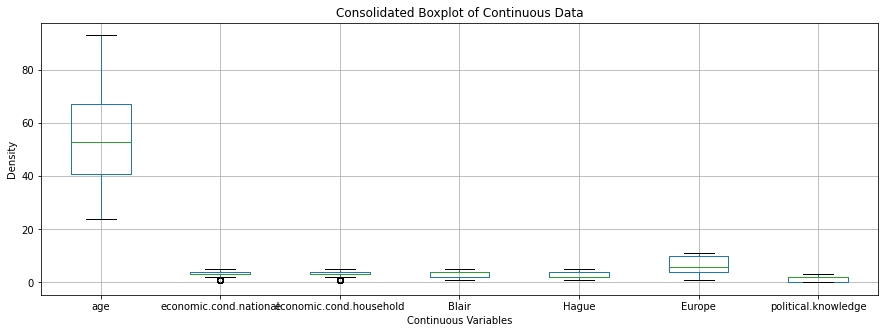

In [21]:
continuous=df_ED.dtypes[(df_ED.dtypes=='int64')].index
data_plot=df_ED[continuous]

data_plot.boxplot(figsize=(15,5));
plt.xlabel("Continuous Variables")
plt.ylabel("Density")
plt.title("Consolidated Boxplot of Continuous Data")


### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

In [144]:
cat=[]
num=[]
for i in df_ED.columns:
    if df_ED[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


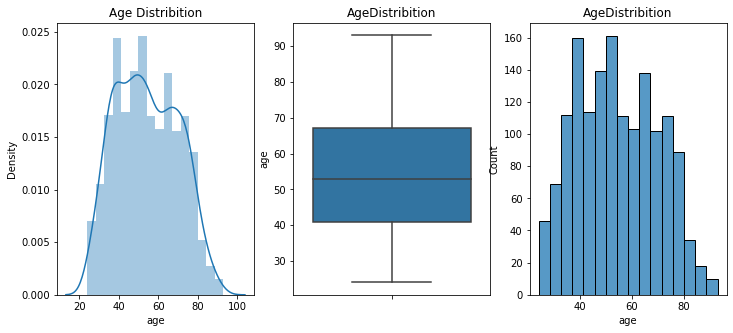

In [147]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
sns.distplot(df_ED['age'],kde=True, ax=ax1)
sns.boxplot(y='age', data=df_ED, orient = "v" , ax=ax2)
sns.histplot(df_ED['age'] , kde=False, ax=ax3)
ax1.set_title('Age Distribition')
ax2.set_title('AgeDistribition')
ax3.set_title('AgeDistribition')             

plt.show()

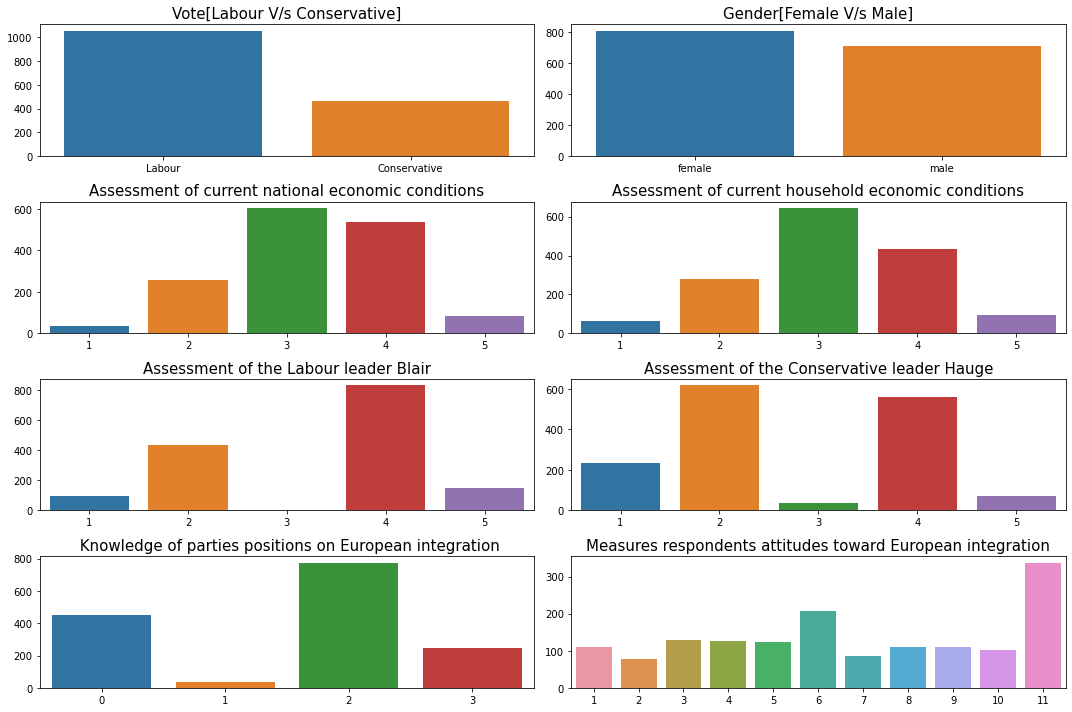

In [149]:
#Univariate Analysis for Nominal variables 'gender and vote' using barplot
#Univariate Analysis for 6 Ordinal variable  using barplot

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 10)

a = sns.barplot(df_ED.vote.value_counts().index, df_ED.vote.value_counts().values, ax=axes[0][0])
a.set_title("Vote[Labour V/s Conservative]",fontsize=15)

a = sns.barplot(df_ED.gender.value_counts().index, df_ED.gender.value_counts().values, ax=axes[0][1])
a.set_title("Gender[Female V/s Male]",fontsize=15)

a = sns.barplot(df_ED['economic.cond.national'].value_counts().index, df_ED['economic.cond.national'].value_counts().values, ax=axes[1][0])
a.set_title("Assessment of current national economic conditions",fontsize=15)

a = sns.barplot(df_ED['economic.cond.household'].value_counts().index, df_ED['economic.cond.household'].value_counts().values, ax=axes[1][1])
a.set_title("Assessment of current household economic conditions",fontsize=15)

a = sns.barplot(df_ED.Blair.value_counts().index, df_ED.Blair.value_counts().values, ax=axes[2][0])
a.set_title("Assessment of the Labour leader Blair",fontsize=15)

a = sns.barplot(df_ED.Hague.value_counts().index, df_ED.Hague.value_counts().values, ax=axes[2][1])
a.set_title("Assessment of the Conservative leader Hauge",fontsize=15)

a = sns.barplot(df_ED['political.knowledge'].value_counts().index, df_ED['political.knowledge'].value_counts().values, ax=axes[3][0])
a.set_title(" Knowledge of parties positions on European integration",fontsize=15)

a = sns.barplot(df_ED.Europe.value_counts().index, df_ED.Europe.value_counts().values, ax=axes[3][1])
a.set_title("Measures respondents attitudes toward European integration",fontsize=15)

plt.tight_layout()
plt.show()


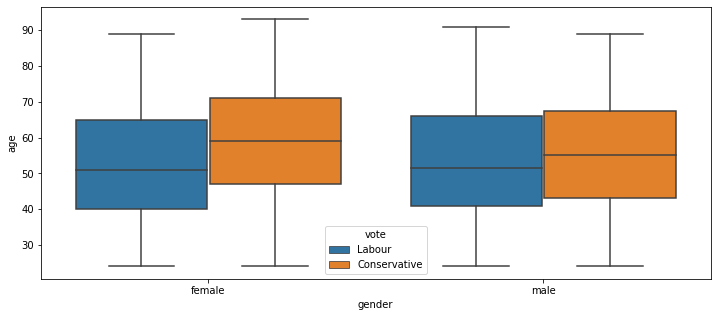

In [75]:
#Age vs Gender and hue=vote:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df_ED['age'],x=df_ED['gender'],hue=df_ED['vote'],ax=ax)
plt.show()

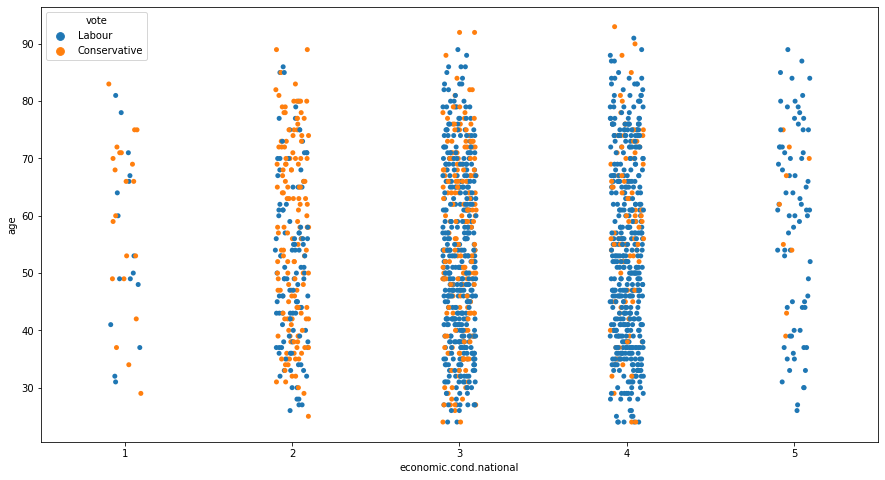

In [89]:
#Age vs economic.cond.national and hue=vote:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y=df_ED['age'], x= df_ED['economic.cond.national'],hue=df_ED['vote'],jitter=True, ax=ax) ### Concentration of observations
plt.show()

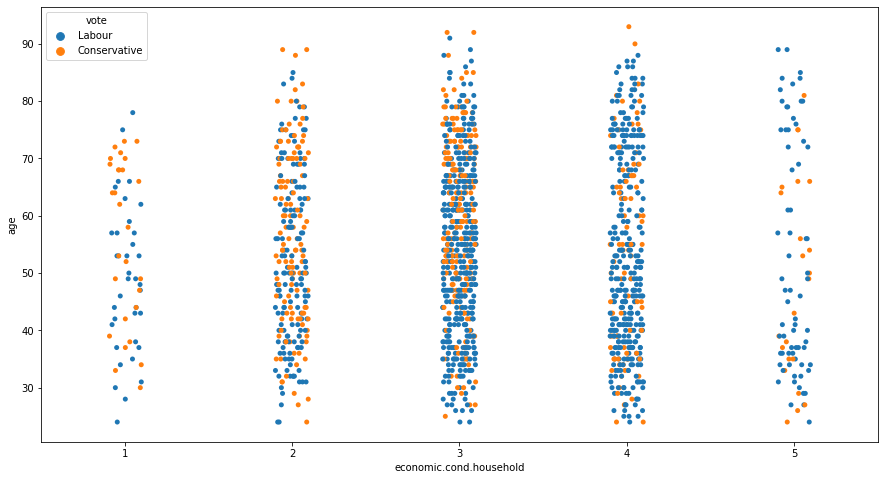

In [90]:
#Age vs economic.cond.household and hue=vote:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y=df_ED['age'], x= df_ED['economic.cond.household'],hue=df_ED['vote'],jitter=True, ax=ax) ### Concentration of observations
plt.show()

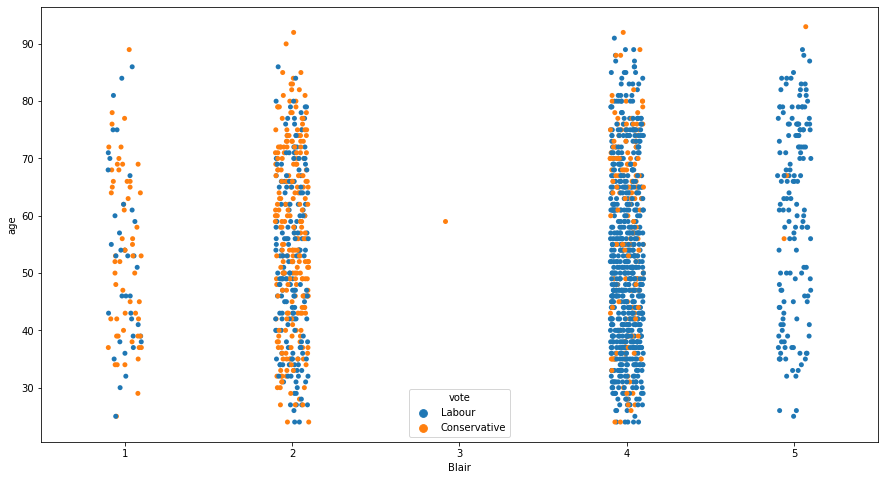

In [91]:
#Age vs Blair and hue=vote:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y=df_ED['age'], x= df_ED['Blair'],hue=df_ED['vote'],jitter=True, ax=ax) ### Concentration of observations
plt.show()

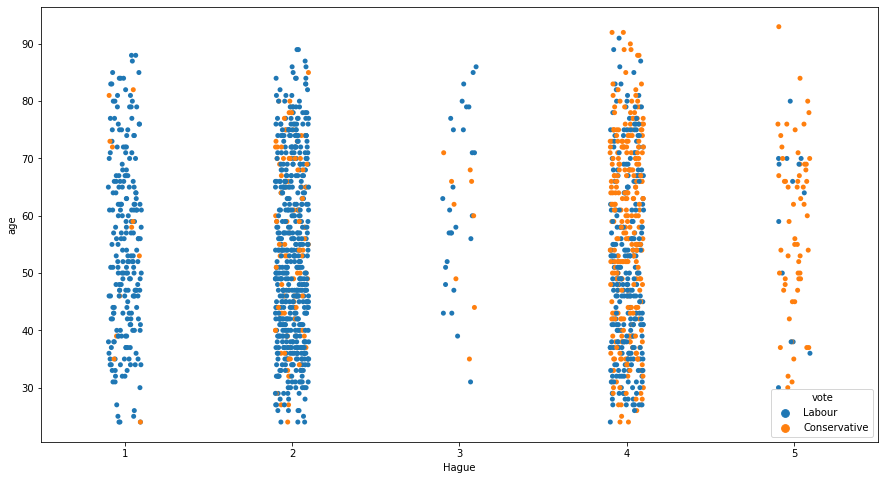

In [92]:
#Age vs hague and hue=vote:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y=df_ED['age'], x= df_ED['Hague'],hue=df_ED['vote'],jitter=True, ax=ax) ### Concentration of observations
plt.show()

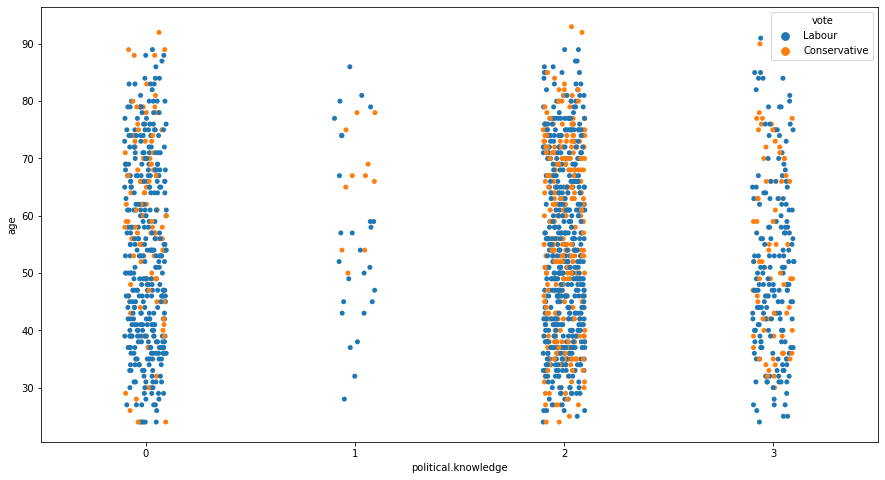

In [93]:
#Age vs political.knowledge and hue=vote:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y=df_ED['age'], x= df_ED['political.knowledge'],hue=df_ED['vote'],jitter=True, ax=ax) 
plt.show()

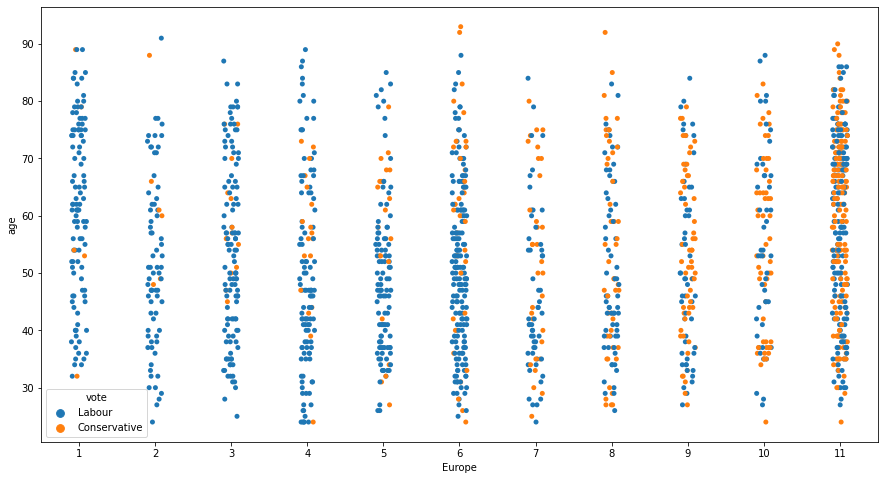

In [94]:
#Age vs Europe and hue=vote:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y=df_ED['age'], x= df_ED['Europe'],hue=df_ED['vote'], ax=ax) ### Concentration of observations
plt.show()

In [87]:
df_ED.vote.value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

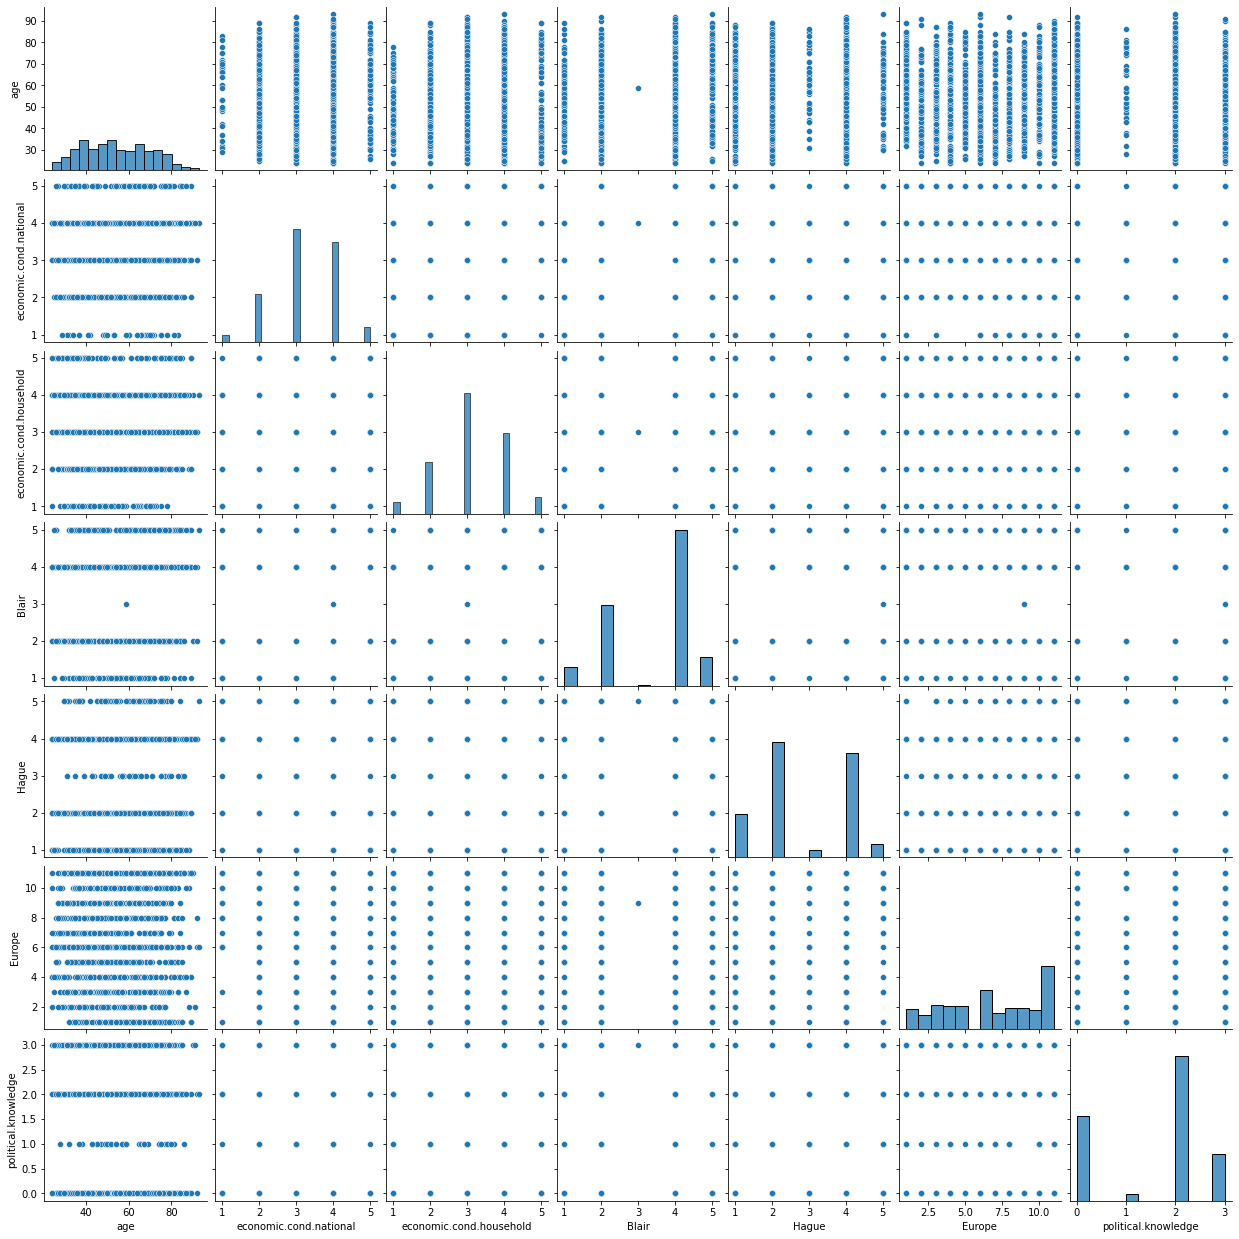

In [40]:
sns.pairplot(df_ED)

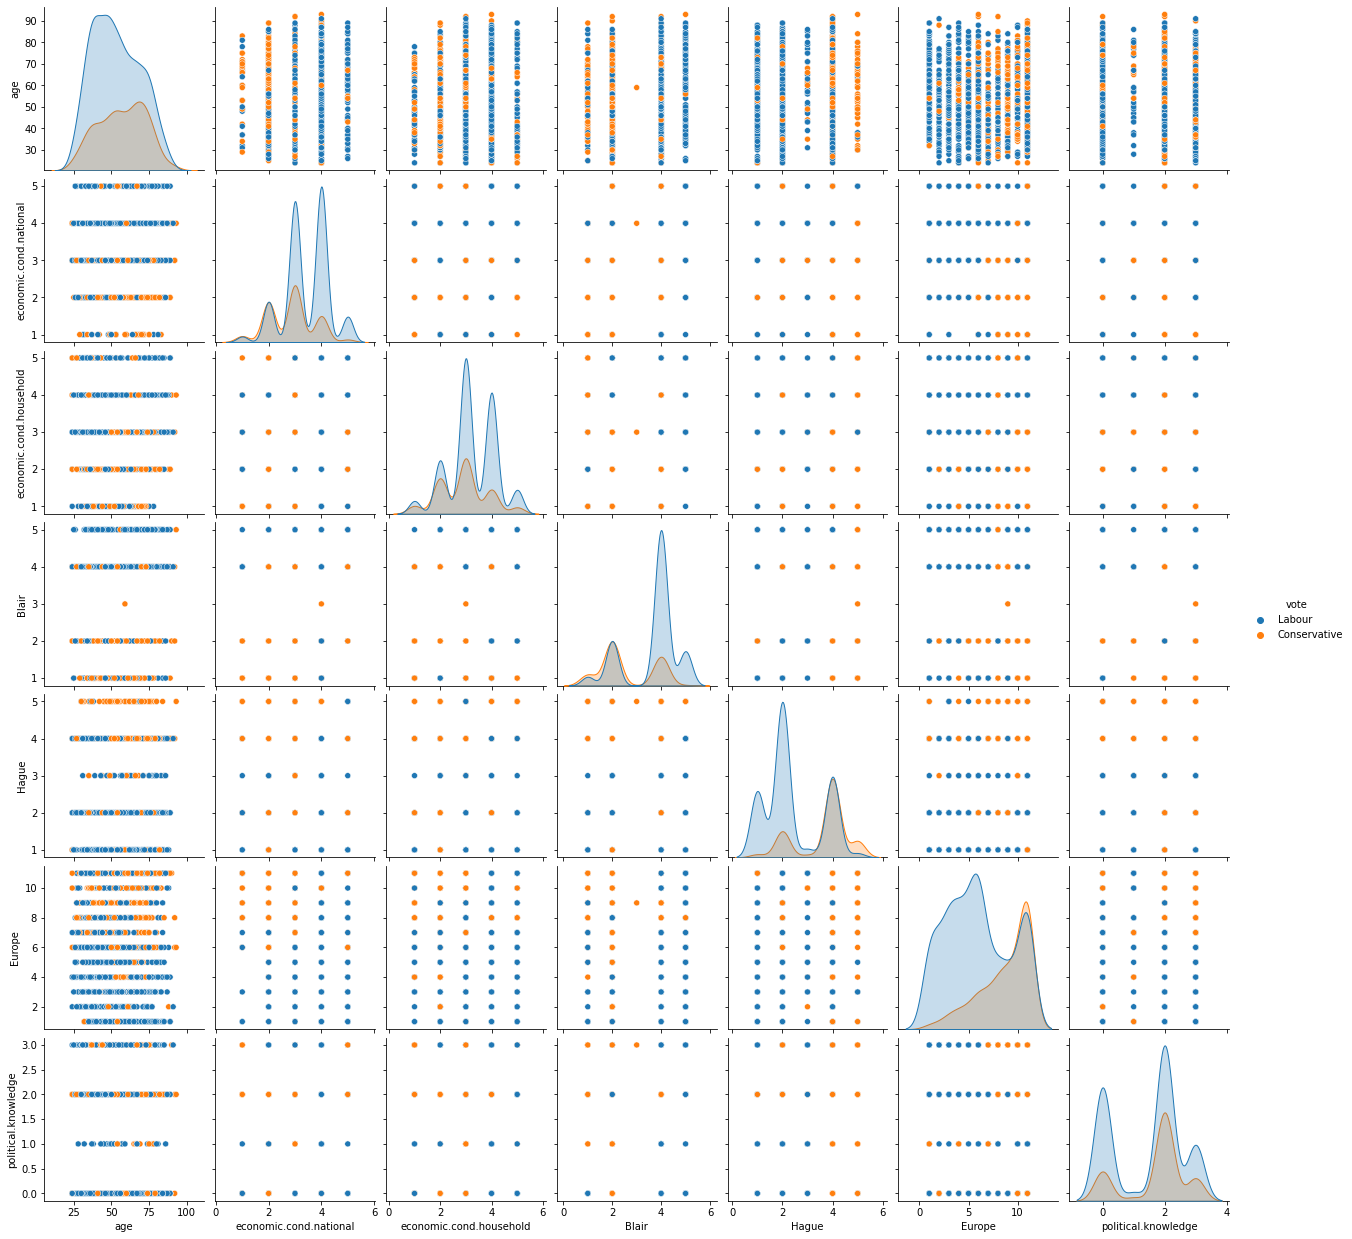

In [39]:
sns.pairplot(df_ED , hue='vote')

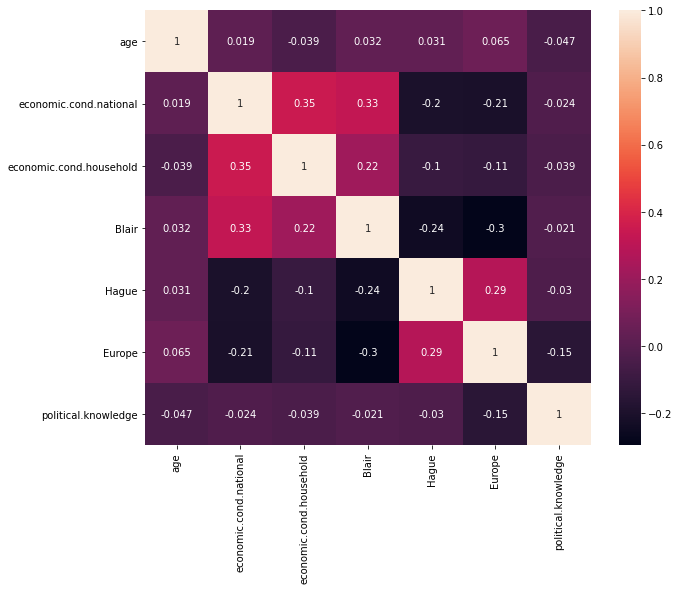

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df_ED.corr(),annot=True)
plt.show()

Checking Outliers

In [42]:
Q1 = df_ED.quantile(0.25)
Q3 = df_ED.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                        26.0
economic.cond.national      1.0
economic.cond.household     1.0
Blair                       2.0
Hague                       2.0
Europe                      6.0
political.knowledge         2.0
dtype: float64


In [44]:
Q1=df_ED['economic.cond.national'].quantile(q=0.25)
Q3=df_ED['economic.cond.national'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in economic.cond.national: ', L_outliers)
print('Upper outliers in economic.cond.national: ', U_outliers)
print('Number of outliers in economic.cond.national upper : ', df_ED[df_ED['economic.cond.national']>5.5]['economic.cond.national'].count())
print('Number of outliers in economic.cond.national lower : ', df_ED[df_ED['economic.cond.national']<1.5]['economic.cond.national'].count())

Lower outliers in economic.cond.national:  1.5
Upper outliers in economic.cond.national:  5.5
Number of outliers in economic.cond.national upper :  0
Number of outliers in economic.cond.national lower :  37


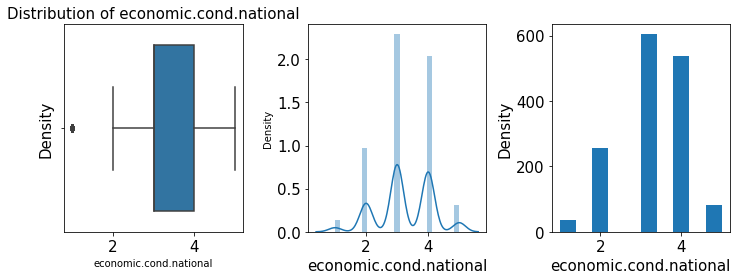

In [48]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,4))
#boxplot
sns.boxplot(x='economic.cond.national',data=df_ED,orient='v',ax=ax1)
ax1.set_ylabel('Density', fontsize=15)
ax1.set_title('Distribution of economic.cond.national', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df_ED['economic.cond.national'],ax=ax2)
ax2.set_xlabel('economic.cond.national', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df_ED['economic.cond.national'])
ax3.set_ylabel('Density', fontsize=15)
ax3.set_xlabel('economic.cond.national', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=1)
plt.tight_layout()


In [47]:
Q1=df_ED['economic.cond.household'].quantile(q=0.25)
Q3=df_ED['economic.cond.household'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in economic.cond.household: ', L_outliers)
print('Upper outliers in economic.cond.household: ', U_outliers)
print('Number of outliers in economic.cond.household upper : ', df_ED[df_ED['economic.cond.household']>5.5]['economic.cond.household'].count())
print('Number of outliers in economic.cond.household lower : ', df_ED[df_ED['economic.cond.household']<1.5]['economic.cond.household'].count())

Lower outliers in economic.cond.household:  1.5
Upper outliers in economic.cond.household:  5.5
Number of outliers in economic.cond.household upper :  0
Number of outliers in economic.cond.household lower :  65


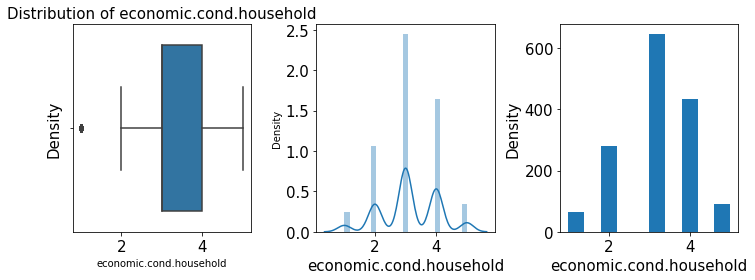

In [49]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,4))
#boxplot
sns.boxplot(x='economic.cond.household',data=df_ED,orient='v',ax=ax1)
ax1.set_ylabel('Density', fontsize=15)
ax1.set_title('Distribution of economic.cond.household', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df_ED['economic.cond.household'],ax=ax2)
ax2.set_xlabel('economic.cond.household', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df_ED['economic.cond.household'])
ax3.set_ylabel('Density', fontsize=15)
ax3.set_xlabel('economic.cond.household', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=1)
plt.tight_layout()


In [ ]:
#num1=['age', 'economic.cond.national', 'economic.cond.household', 'Blair, 'Hague', 'Europe', 'political.knowledge'] 


In [ ]:
#df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [88]:
df_ED.vote.value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

In [150]:
## Converting the 'vote' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE=LabelEncoder()

In [151]:
## Applying the created Label Encoder object for the target class

df_ED['vote']=LE.fit_transform(df_ED['vote'])

In [241]:
df_ED.vote.value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [152]:
cat1= ['gender']
cat1

['gender']

In [153]:
## Converting the other 'object' type variables as dummy variables


df_ED=pd.get_dummies(df_ED,columns=cat1,drop_first=True)
df_ED.head()


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [154]:
df_ED.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int32
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender_male              1517 non-null   uint8
dtypes: int32(1), int64(7), uint8(1)
memory usage: 102.2 KB


### Train-Test Split

In [155]:
# Copy all the predictor variables into X dataframe
X = df_ED.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df_ED['vote']

In [287]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [64]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int32

In [156]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [103]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456,)


In [104]:
y_train.value_counts(1)

1    0.71065
0    0.28935
Name: vote, dtype: float64

In [105]:
y_test.value_counts(1)

1    0.664474
0    0.335526
Name: vote, dtype: float64

### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)

### Logistic Regression

Logistic Regression Model Without Model Tuning

In [281]:
from sklearn.linear_model import LogisticRegression

In [282]:
Logistic_model = LogisticRegression()#(solver='newton-cg',max_iter=10000,penalty='none',random_state=1)
Logistic_model.fit(X_train, y_train)

LogisticRegression()

In [283]:
y_train_predict_lgr=Logistic_model.predict(X_train)
y_test_predict_lgr=Logistic_model.predict(X_test)
Logistic_model_score_train=Logistic_model.score(X_train,y_train)
Logistic_model_score_test=Logistic_model.score(X_test,y_test)
print("Logistic Model Score for Train Data is ", Logistic_model_score_train)
print("Logistic Model Score for Train Data is ", Logistic_model_score_test)

Logistic Model Score for Train Data is  0.8350612629594723
Logistic Model Score for Train Data is  0.8267543859649122


In [284]:
y_train_predict_prob_lgr=Logistic_model.predict_proba(X_train)
y_test_predict_prob_lgr=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob_lgr).head()

,0,1
0,0.426821,0.573179
1,0.146108,0.853892
2,0.005677,0.994323
3,0.845837,0.154163
4,0.060710,0.939290


Confusion matrix & Classification report for Training and Testing dataset

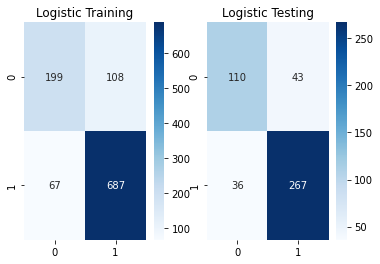

In [285]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_lgr),annot=True,fmt='.5g',cmap='Blues')
plt.title('Logistic Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_lgr),annot=True,fmt='.5g',cmap='Blues')
plt.title('Logistic Testing')

plt.show()

In [286]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_lgr),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_lgr),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



AUC and ROC for the training & testing data

AUC score for Training data: 0.890
AUC score for Testing data: 0.879


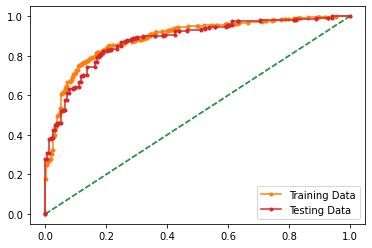

In [287]:
# calculate AUC
lgr_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_lgr[:,1])
print('AUC score for Training data: %.3f' % lgr_train_auc)
# calculate roc curve
lgr_train_fpr, lgr_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_lgr[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lgr_train_fpr, lgr_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
lgr_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_lgr[:,1])
print('AUC score for Testing data: %.3f' % lgr_test_auc)
# calculate roc curve
lgr_test_fpr, lgr_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_lgr[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lgr_test_fpr, lgr_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [481]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [288]:
print('AUC score for Training data:',lgr_train_auc)
cmetrics=classification_report(y_train,y_train_predict_lgr,output_dict=True)
df_lgrtrain=pd.DataFrame(cmetrics).transpose()
lgr_train_f1=round(df_lgrtrain.loc["1"][2],2)
lgr_train_recall=round(df_lgrtrain.loc["1"][1],2)
lgr_train_precision=round(df_lgrtrain.loc["1"][0],2)
lgr_train_accuracy=round(df_lgrtrain.loc["accuracy"][0],2)
df_lgrtrain

AUC score for Training data: 0.8898167428438122


,precision,recall,f1-score,support
0,0.748120,0.648208,0.694590,307.000000
1,0.864151,0.911141,0.887024,754.000000
accuracy,0.835061,0.835061,0.835061,0.835061
macro avg,0.806136,0.779675,0.790807,1061.000000
weighted avg,0.830578,0.835061,0.831343,1061.000000


In [289]:
print('AUC score for Testing data:',lgr_test_auc)
cmetrics=classification_report(y_test,y_test_predict_lgr,output_dict=True)
df_lgrtest=pd.DataFrame(cmetrics).transpose()
lgr_test_f1=round(df_lgrtest.loc["1"][2],2)
lgr_test_recall=round(df_lgrtest.loc["1"][1],2)
lgr_test_precision=round(df_lgrtest.loc["1"][0],2)
lgr_test_accuracy=round(df_lgrtest.loc["accuracy"][0],2)
df_lgrtest


AUC score for Testing data: 0.8790310403589379


,precision,recall,f1-score,support
0,0.753425,0.718954,0.735786,153.000000
1,0.861290,0.881188,0.871126,303.000000
accuracy,0.826754,0.826754,0.826754,0.826754
macro avg,0.807357,0.800071,0.803456,456.000000
weighted avg,0.825099,0.826754,0.825716,456.000000


### LDA

In [290]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [291]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [292]:
y_train_predict_lda=LDA_model.predict(X_train)
y_test_predict_lda=LDA_model.predict(X_test)
LDA_model_score_train=LDA_model.score(X_train,y_train)
LDA_model_score_test=LDA_model.score(X_test,y_test)
print("LDA Model Score for Train Data is ", LDA_model_score_train)
print("LDA Model Score for Train Data is ", LDA_model_score_test)

LDA Model Score for Train Data is  0.8341187558906692
LDA Model Score for Train Data is  0.8333333333333334


In [293]:
y_train_predict_prob_lda=LDA_model.predict_proba(X_train)
y_test_predict_prob_lda=LDA_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob_lda).head()

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455


Confusion matrix & Classification report for Training and Testing dataset

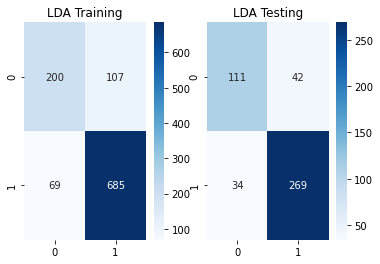

In [294]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_lda),annot=True,fmt='.5g',cmap='Blues')
plt.title('LDA Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_lda),annot=True,fmt='.5g',cmap='Blues')
plt.title('LDA Testing')

plt.show()

In [295]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_lda),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_lda),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC and ROC for the training & testing data

AUC score for Training data: 0.889
AUC score for Testing data: 0.888


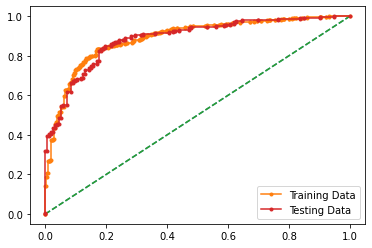

In [296]:
# calculate AUC
lda_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_lda[:,1])
print('AUC score for Training data: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
lda_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_lda[:,1])
print('AUC score for Testing data: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [297]:
print('AUC score for Training data:',lda_train_auc)
cmetrics=classification_report(y_train,y_train_predict_lda,output_dict=True)
df_ldatrain=pd.DataFrame(cmetrics).transpose()
lda_train_f1=round(df_ldatrain.loc["1"][2],2)
lda_train_recall=round(df_ldatrain.loc["1"][1],2)
lda_train_precision=round(df_ldatrain.loc["1"][0],2)
lda_train_accuracy=round(df_ldatrain.loc["accuracy"][0],2)
df_ldatrain

AUC score for Training data: 0.8893674560865394


,precision,recall,f1-score,support
0,0.743494,0.651466,0.694444,307.000000
1,0.864899,0.908488,0.886158,754.000000
accuracy,0.834119,0.834119,0.834119,0.834119
macro avg,0.804197,0.779977,0.790301,1061.000000
weighted avg,0.829771,0.834119,0.830686,1061.000000


In [298]:
print('AUC score for Testing data:',lda_test_auc)
cmetrics=classification_report(y_test,y_test_predict_lda,output_dict=True)
df_ldatest=pd.DataFrame(cmetrics).transpose()
lda_test_f1=round(df_ldatest.loc["1"][2],2)
lda_test_recall=round(df_ldatest.loc["1"][1],2)
lda_test_precision=round(df_ldatest.loc["1"][0],2)
lda_test_accuracy=round(df_ldatest.loc["accuracy"][0],2)
df_ldatest

AUC score for Testing data: 0.8876377833861817


,precision,recall,f1-score,support
0,0.765517,0.725490,0.744966,153.000000
1,0.864952,0.887789,0.876221,303.000000
accuracy,0.833333,0.833333,0.833333,0.833333
macro avg,0.815235,0.806639,0.810594,456.000000
weighted avg,0.831589,0.833333,0.832182,456.000000


### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

### Naive Bayes Model

In [299]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [300]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [326]:
y_train_predict_nb=NB_model.predict(X_train)
y_test_predict_nb=NB_model.predict(X_test)
NB_model_score_train=NB_model.score(X_train,y_train)
NB_model_score_test=NB_model.score(X_test,y_test)
print("Naive Bayes Model Score for Train Data is ", NB_model_score_train)
print("Naive Bayes Model Score for Train Data is ", NB_model_score_test)

Naive Bayes Model Score for Train Data is  0.8350612629594723
Naive Bayes Model Score for Train Data is  0.8223684210526315


In [302]:
y_train_predict_prob_nb=NB_model.predict_proba(X_train)
y_test_predict_prob_nb=NB_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob_nb).head()

,0,1
0,0.536792,0.463208
1,0.120285,0.879715
2,0.000332,0.999668
3,0.945240,0.054760
4,0.039267,0.960733


Confusion matrix & Classification report for Training and Testing dataset

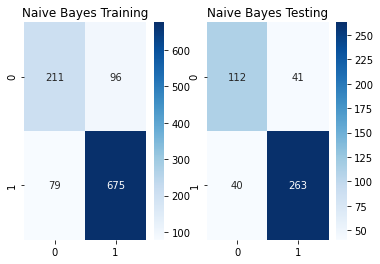

In [303]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_nb),annot=True,fmt='.5g',cmap='Blues')
plt.title('Naive Bayes Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_nb),annot=True,fmt='.5g',cmap='Blues')
plt.title('Naive Bayes Testing')

plt.show()

In [304]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_nb),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_nb),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



AUC and ROC for the training & testing data

AUC score for Training data: 0.888
AUC score for Testing data: 0.876


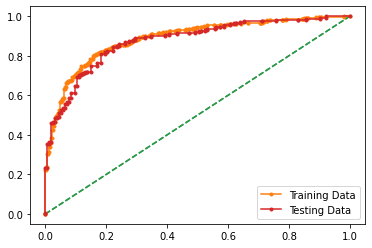

In [305]:
# calculate AUC
nb_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_nb[:,1])
print('AUC score for Training data: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_nb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
nb_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_nb[:,1])
print('AUC score for Testing data: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_nb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [306]:
print('AUC score for Training data:',nb_train_auc)
cmetrics=classification_report(y_train,y_train_predict_nb,output_dict=True)
df_nbtrain=pd.DataFrame(cmetrics).transpose()
nb_train_f1=round(df_nbtrain.loc["1"][2],2)
nb_train_recall=round(df_nbtrain.loc["1"][1],2)
nb_train_precision=round(df_nbtrain.loc["1"][0],2)
nb_train_accuracy=round(df_nbtrain.loc["accuracy"][0],2)
df_nbtrain

AUC score for Training data: 0.8879375145802193


,precision,recall,f1-score,support
0,0.727586,0.687296,0.706868,307.000000
1,0.875486,0.895225,0.885246,754.000000
accuracy,0.835061,0.835061,0.835061,0.835061
macro avg,0.801536,0.791261,0.796057,1061.000000
weighted avg,0.832692,0.835061,0.833632,1061.000000


In [307]:
print('AUC score for Testing data:',nb_test_auc)
cmetrics=classification_report(y_test,y_test_predict_nb,output_dict=True)
df_nbtest=pd.DataFrame(cmetrics).transpose()
nb_test_f1=round(df_nbtest.loc["1"][2],2)
nb_test_recall=round(df_nbtest.loc["1"][1],2)
nb_test_precision=round(df_nbtest.loc["1"][0],2)
nb_test_accuracy=round(df_nbtest.loc["accuracy"][0],2)
df_nbtest

AUC score for Testing data: 0.8763562630772882


,precision,recall,f1-score,support
0,0.736842,0.732026,0.734426,153.000000
1,0.865132,0.867987,0.866557,303.000000
accuracy,0.822368,0.822368,0.822368,0.822368
macro avg,0.800987,0.800006,0.800492,456.000000
weighted avg,0.822087,0.822368,0.822224,456.000000


### KNN Model

In [308]:
from sklearn.neighbors import KNeighborsClassifier


In [309]:
#scaling the X_train and X_test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Default value of n_neighbors is equal to 5.First we will build KNN Model with k=5.

In [310]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [311]:
y_train_predict_knn=KNN_model.predict(X_train_scaled)
y_test_predict_knn=KNN_model.predict(X_test_scaled)
KNN_model_score_train=KNN_model.score(X_train_scaled,y_train)
KNN_model_score_test=KNN_model.score(X_test_scaled,y_test)
print("KNN Model Score for Train Data is ", KNN_model_score_train)
print("KNN Model Score for Test Data is ", KNN_model_score_test)

KNN Model Score for Train Data is  0.8539114043355325
KNN Model Score for Test Data is  0.8245614035087719


In [312]:
y_train_predict_prob_knn=KNN_model.predict_proba(X_train_scaled)
y_test_predict_prob_knn=KNN_model.predict_proba(X_test_scaled)

Confusion matrix & Classification report for Training and Testing dataset

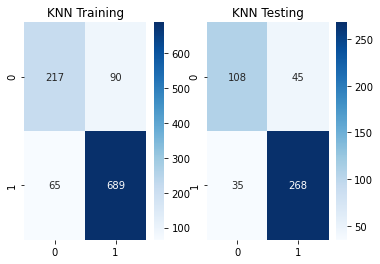

In [313]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_knn),annot=True,fmt='.5g',cmap='Blues')
plt.title('KNN Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_knn),annot=True,fmt='.5g',cmap='Blues')
plt.title('KNN Testing')

plt.show()

In [314]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_knn),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_knn),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



AUC score for Training data: 0.928
AUC score for Testing data: 0.867


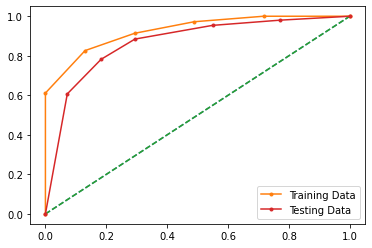

In [315]:
# calculate AUC
knn_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_knn[:,1])
print('AUC score for Training data: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
knn_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_knn[:,1])
print('AUC score for Testing data: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [553]:
print('AUC score for Training data:',knn_train_auc)
cmetrics=classification_report(y_train,y_train_predict_knn,output_dict=True)
df_knntrain=pd.DataFrame(cmetrics).transpose()
knn_train_f1=round(df_knntrain.loc["1"][2],2)
knn_train_recall=round(df_knntrain.loc["1"][1],2)
knn_train_precision=round(df_knntrain.loc["1"][0],2)
knn_train_accuracy=round(df_knntrain.loc["accuracy"][0],2)
df_knntrain

AUC score for Training data: 0.9278765152627896


,precision,recall,f1-score,support
0,0.769504,0.706840,0.736842,307.000000
1,0.884467,0.913793,0.898891,754.000000
accuracy,0.853911,0.853911,0.853911,0.853911
macro avg,0.826985,0.810317,0.817867,1061.000000
weighted avg,0.851203,0.853911,0.852002,1061.000000


In [317]:
print('AUC score for Testing data:',knn_test_auc)
cmetrics=classification_report(y_test,y_test_predict_knn,output_dict=True)
df_knntest=pd.DataFrame(cmetrics).transpose()
knn_test_f1=round(df_knntest.loc["1"][2],2)
knn_test_recall=round(df_knntest.loc["1"][1],2)
knn_test_precision=round(df_knntest.loc["1"][0],2)
knn_test_accuracy=round(df_knntest.loc["accuracy"][0],2)
df_knntest

AUC score for Testing data: 0.8672857481826615


,precision,recall,f1-score,support
0,0.755245,0.705882,0.729730,153.000000
1,0.856230,0.884488,0.870130,303.000000
accuracy,0.824561,0.824561,0.824561,0.824561
macro avg,0.805737,0.795185,0.799930,456.000000
weighted avg,0.822347,0.824561,0.823022,456.000000


Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis classification error

Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [554]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # evaluate accuracy
    scores = knn.score(X_test_scaled, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.2171052631578947,
 0.1907894736842105,
 0.17543859649122806,
 0.1842105263157895,
 0.17982456140350878,
 0.16666666666666663,
 0.17543859649122806,
 0.17324561403508776,
 0.16447368421052633,
 0.16885964912280704]

In [558]:
scores=[]
for k in range(1,20):
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'distance' )
    NNH.fit(X_train_scaled, y_train)
    scores.append(NNH.score(X_test_scaled, y_test))

In [559]:
scores

[0.7828947368421053,
 0.7828947368421053,
 0.7960526315789473,
 0.8026315789473685,
 0.8179824561403509,
 0.8179824561403509,
 0.8179824561403509,
 0.8179824561403509,
 0.8157894736842105,
 0.8289473684210527,
 0.8289473684210527,
 0.8355263157894737,
 0.8267543859649122,
 0.8355263157894737,
 0.8267543859649122,
 0.8333333333333334,
 0.8289473684210527,
 0.8355263157894737,
 0.8355263157894737]

Plot misclassification error vs k (with k value on X-axis) using matplotlib.

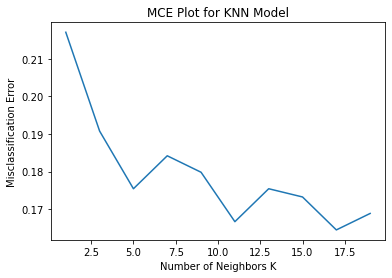

In [560]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title("MCE Plot for KNN Model")
plt.show()

### KNN Model with K=17

In [651]:
KNN_nw=KNeighborsClassifier(n_neighbors=17)
KNN_nw.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=17)

In [652]:
y_train_predict_knnnw=KNN_nw.predict(X_train_scaled)
y_test_predict_knnnw=KNN_nw.predict(X_test_scaled)
KNNnw_model_score_train=KNN_nw.score(X_train_scaled,y_train)
KNNnw_model_score_test=KNN_nw.score(X_test_scaled,y_test)
print("KNN Model with K=17 Score for Train Data is ", KNNnw_model_score_train)
print("KNN Model with K=17 Score for Test Data is ", KNNnw_model_score_test)

KNN Model with K=17 Score for Train Data is  0.8360037700282752
KNN Model with K=17 Score for Test Data is  0.8355263157894737


In [653]:
y_train_predict_prob_knnnw=KNN_nw.predict_proba(X_train_scaled)
y_test_predict_prob_knnnw=KNN_nw.predict_proba(X_test_scaled)

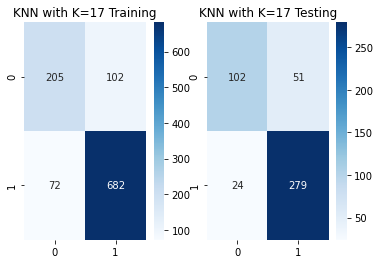

In [655]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_knnnw),annot=True,fmt='.5g',cmap='Blues')
plt.title('KNN with K=17 Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_knnnw),annot=True,fmt='.5g',cmap='Blues')
plt.title('KNN with K=17 Testing')

plt.show()

In [656]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_knnnw),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_knnnw),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.74      0.67      0.70       307
           1       0.87      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.81      0.67      0.73       153
           1       0.85      0.92      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.79      0.81       456
weighted avg       0.83      0.84      0.83       456
 



AUC score for Training data: 0.905
AUC score for Testing data: 0.888


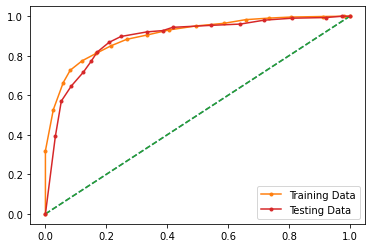

In [657]:
# calculate AUC
knnnw_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_knnnw[:,1])
print('AUC score for Training data: %.3f' % knnnw_train_auc)
# calculate roc curve
knnnw_train_fpr, knnnw_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_knnnw[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knnnw_train_fpr, knnnw_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
knnnw_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_knnnw[:,1])
print('AUC score for Testing data: %.3f' % knnnw_test_auc)
# calculate roc curve
knnnw_test_fpr, knnnw_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_knnnw[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knnnw_test_fpr, knnnw_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [658]:
print('AUC score for Training data:',knnnw_train_auc)
cmetrics=classification_report(y_train,y_train_predict_knnnw,output_dict=True)
df_knnnwtrain=pd.DataFrame(cmetrics).transpose()
knnnw_train_f1=round(df_knnnwtrain.loc["1"][2],2)
knnnw_train_recall=round(df_knnnwtrain.loc["1"][1],2)
knnnw_train_precision=round(df_knnnwtrain.loc["1"][0],2)
knnnw_train_accuracy=round(df_knnnwtrain.loc["accuracy"][0],2)
df_knnnwtrain

AUC score for Training data: 0.9046302456388944


,precision,recall,f1-score,support
0,0.740072,0.667752,0.702055,307.000000
1,0.869898,0.904509,0.886866,754.000000
accuracy,0.836004,0.836004,0.836004,0.836004
macro avg,0.804985,0.786131,0.794460,1061.000000
weighted avg,0.832333,0.836004,0.833391,1061.000000


In [659]:
print('AUC score for Testing data:',knnnw_test_auc)
cmetrics=classification_report(y_test,y_test_predict_knnnw,output_dict=True)
df_knnnwtest=pd.DataFrame(cmetrics).transpose()
knnnw_test_f1=round(df_knnnwtest.loc["1"][2],2)
knnnw_test_recall=round(df_knnnwtest.loc["1"][1],2)
knnnw_test_precision=round(df_knnnwtest.loc["1"][0],2)
knnnw_test_accuracy=round(df_knnnwtest.loc["accuracy"][0],2)
df_knnnwtest

AUC score for Testing data: 0.8877456373088289


,precision,recall,f1-score,support
0,0.809524,0.666667,0.731183,153.000000
1,0.845455,0.920792,0.881517,303.000000
accuracy,0.835526,0.835526,0.835526,0.835526
macro avg,0.827489,0.793729,0.806350,456.000000
weighted avg,0.833399,0.835526,0.831076,456.000000


### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### Logistic Regression using GridSearch

In [321]:
from sklearn.model_selection import GridSearchCV

In [576]:
grid={'penalty':['l2','none'],
      'solver':['liblinear','lbfgs','sag','newton-cg'],
      'tol':[0.0001,0.000001],
       'C' : [0.01,0.1,10,100]}

In [577]:
model=LogisticRegression(max_iter=10000,n_jobs=2)

In [578]:
lgr_gs_model=GridSearchCV(estimator=model,param_grid=grid,cv=3,n_jobs=-1,scoring='f1')

In [579]:
lgr_gs_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 10, 100], 'penalty': ['l2', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [580]:
print(lgr_gs_model.best_params_)

{'C': 0.01, 'penalty': 'none', 'solver': 'sag', 'tol': 1e-06}


In [581]:
best_model_lgr=lgr_gs_model.best_estimator_
best_model_lgr

LogisticRegression(C=0.01, max_iter=10000, n_jobs=2, penalty='none',
                   solver='sag', tol=1e-06)

In [582]:
lgr_best_train=best_model_lgr.score(X_train,y_train)
lgr_best_test=best_model_lgr.score(X_test,y_test)
print("Logistic Regression GridSreach Model Score for Train Data is ", lgr_best_train)
print("Logistic Regression GridSreach Model Score for Test Data is", lgr_best_test)

Logistic Regression GridSreach Model Score for Train Data is  0.8312912346842601
Logistic Regression GridSreach Model Score for Test Data is 0.831140350877193


In [583]:
y_train_predict_lgrgs=best_model_lgr.predict(X_train)
y_test_predict_lgrgs=best_model_lgr.predict(X_test)

In [584]:
y_train_predict_prob_lgrgs=best_model_lgr.predict_proba(X_train)
y_test_predict_prob_lgrgs=best_model_lgr.predict_proba(X_test)

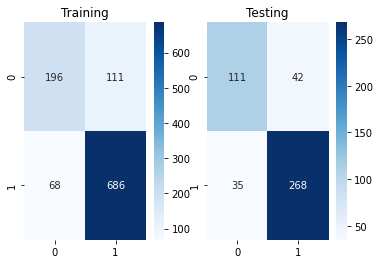

In [585]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_lgrgs),annot=True,fmt='.5g',cmap='Blues')
plt.title('Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_lgrgs),annot=True,fmt='.5g',cmap='Blues')
plt.title('Testing')

plt.show()

In [586]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_lgrgs),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_lgrgs),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC score for Training data: 0.890
AUC score for Testing data: 0.883


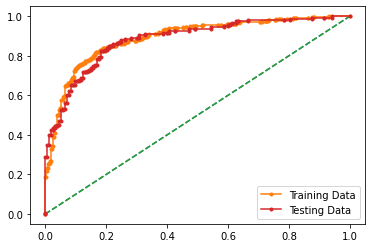

In [587]:
# calculate AUC
lgrgs_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_lgrgs[:,1])
print('AUC score for Training data: %.3f' % lgrgs_train_auc)
# calculate roc curve
lgrgs_train_fpr, lgrgs_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_lgrgs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lgrgs_train_fpr, lgrgs_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
lgrgs_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_lgrgs[:,1])
print('AUC score for Testing data: %.3f' % lgrgs_test_auc)
# calculate roc curve
lgrgs_test_fpr, lgrgs_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_lgrgs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lgrgs_test_fpr, lgrgs_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [588]:
print('AUC score for Training data:',lgrgs_train_auc)
cmetrics=classification_report(y_train,y_train_predict_lgrgs,output_dict=True)
df_lgrgstrain=pd.DataFrame(cmetrics).transpose()
lgrgs_train_f1=round(df_lgrgstrain.loc["1"][2],2)
lgrgs_train_recall=round(df_lgrgstrain.loc["1"][1],2)
lgrgs_train_precision=round(df_lgrgstrain.loc["1"][0],2)
lgrgs_train_accuracy=round(df_lgrgstrain.loc["accuracy"][0],2)
df_lgrgstrain

AUC score for Training data: 0.8900068257026587


,precision,recall,f1-score,support
0,0.742424,0.638436,0.686515,307.000000
1,0.860728,0.909814,0.884591,754.000000
accuracy,0.831291,0.831291,0.831291,0.831291
macro avg,0.801576,0.774125,0.785553,1061.000000
weighted avg,0.826497,0.831291,0.827277,1061.000000


In [589]:
print('AUC score for Testing data:',lgrgs_test_auc)
cmetrics=classification_report(y_test,y_test_predict_lgrgs,output_dict=True)
df_lgrgstest=pd.DataFrame(cmetrics).transpose()
lgrgs_test_f1=round(df_lgrgstest.loc["1"][2],2)
lgrgs_test_recall=round(df_lgrgstest.loc["1"][1],2)
lgrgs_test_precision=round(df_lgrgstest.loc["1"][0],2)
lgrgs_test_accuracy=round(df_lgrgstest.loc["accuracy"][0],2)
df_lgrgstest


AUC score for Testing data: 0.8826549321598827


,precision,recall,f1-score,support
0,0.760274,0.725490,0.742475,153.00000
1,0.864516,0.884488,0.874388,303.00000
accuracy,0.831140,0.831140,0.831140,0.83114
macro avg,0.812395,0.804989,0.808432,456.00000
weighted avg,0.829540,0.831140,0.830128,456.00000


### LDA model using GridSearch

In [335]:
grid1={'solver':['svd', 'lsqr', 'eigen'],
     'tol':[0.0001,0.0002,0.0003]}

In [336]:
lda_grid=LinearDiscriminantAnalysis()

In [337]:
lda_grid_search=GridSearchCV(estimator=lda_grid,param_grid=grid1,cv=2,n_jobs=4,scoring='accuracy',verbose=1)

In [338]:
lda_grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=LinearDiscriminantAnalysis(), n_jobs=4,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='accuracy', verbose=1)

In [339]:
print(lda_grid_search.best_params_)

{'solver': 'svd', 'tol': 0.0001}


In [340]:
best_model_lda=lda_grid_search.best_estimator_
best_model_lda

LinearDiscriminantAnalysis()

In [341]:
lda_best_train=best_model_lda.score(X_train,y_train)
lda_best_test=best_model_lda.score(X_test,y_test)
print("LDA GridSreach Model Score for Train Data is ", lda_best_train)
print("LDA GridSreach Model Score for Test Data is", lda_best_test)

LDA GridSreach Model Score for Train Data is  0.8341187558906692
LDA GridSreach Model Score for Test Data is 0.8333333333333334


In [342]:
y_train_predict_ldags=best_model_lda.predict(X_train)
y_test_predict_ldags=best_model_lda.predict(X_test)
y_train_predict_prob_ldags=best_model_lda.predict_proba(X_train)
y_test_predict_prob_ldags=best_model_lda.predict_proba(X_test)

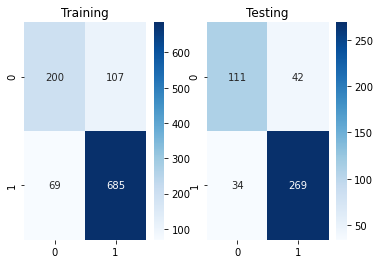

In [343]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_ldags),annot=True,fmt='.5g',cmap='Blues')
plt.title('Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_ldags),annot=True,fmt='.5g',cmap='Blues')
plt.title('Testing')

plt.show()

In [344]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_ldags),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_ldags),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC score for Training data: 0.889
AUC score for Testing data: 0.888


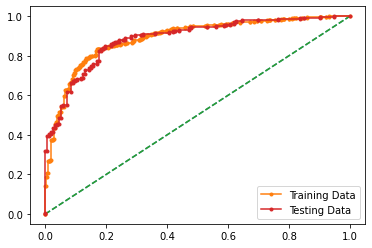

In [345]:
# calculate AUC
ldags_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_ldags[:,1])
print('AUC score for Training data: %.3f' % ldags_train_auc)
# calculate roc curve
ldags_train_fpr, ldags_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_ldags[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldags_train_fpr, ldags_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
ldags_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_ldags[:,1])
print('AUC score for Testing data: %.3f' % ldags_test_auc)
# calculate roc curve
ldags_test_fpr, ldags_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_ldags[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldags_test_fpr, ldags_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [346]:
print('AUC score for Training data:',ldags_train_auc)
cmetrics=classification_report(y_train,y_train_predict_ldags,output_dict=True)
df_ldagstrain=pd.DataFrame(cmetrics).transpose()
ldags_train_f1=round(df_ldagstrain.loc["1"][2],2)
ldags_train_recall=round(df_ldagstrain.loc["1"][1],2)
ldags_train_precision=round(df_ldagstrain.loc["1"][0],2)
ldags_train_accuracy=round(df_ldagstrain.loc["accuracy"][0],2)
df_ldagstrain

AUC score for Training data: 0.8893674560865394


,precision,recall,f1-score,support
0,0.743494,0.651466,0.694444,307.000000
1,0.864899,0.908488,0.886158,754.000000
accuracy,0.834119,0.834119,0.834119,0.834119
macro avg,0.804197,0.779977,0.790301,1061.000000
weighted avg,0.829771,0.834119,0.830686,1061.000000


In [347]:
print('AUC score for Testing data:',ldags_test_auc)
cmetrics=classification_report(y_test,y_test_predict_ldags,output_dict=True)
df_ldagstest=pd.DataFrame(cmetrics).transpose()
ldags_test_f1=round(df_ldagstest.loc["1"][2],2)
ldags_test_recall=round(df_ldagstest.loc["1"][1],2)
ldags_test_precision=round(df_ldagstest.loc["1"][0],2)
ldags_test_accuracy=round(df_ldagstest.loc["accuracy"][0],2)
df_ldagstest

AUC score for Testing data: 0.8876377833861817


,precision,recall,f1-score,support
0,0.765517,0.725490,0.744966,153.000000
1,0.864952,0.887789,0.876221,303.000000
accuracy,0.833333,0.833333,0.833333,0.833333
macro avg,0.815235,0.806639,0.810594,456.000000
weighted avg,0.831589,0.833333,0.832182,456.000000


### Naive Bayes Model with Tuning- Grid Search

In [368]:
param_grid_NB = {
 'var_smoothing': np.logspace(0,-9, num=100)}

In [375]:
NB_model_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_NB, verbose=1,scoring='accuracy',cv=3)
NB_model_grid.fit(X_train, y_train)
print(NB_model_grid.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
GaussianNB(var_smoothing=0.0006579332246575676)


In [376]:
NB_best_model=NB_model_grid.best_estimator_
NB_best_model

GaussianNB(var_smoothing=0.0006579332246575676)

In [377]:
NB_best_train=NB_best_model.score(X_train,y_train)
NB_best_test=NB_best_model.score(X_test,y_test)
print("Naive Bayes GridSreach Model Score for Train Data is ", NB_best_train)
print("Naive Bayes Model Score for Test Data is", NB_best_test)

Naive Bayes GridSreach Model Score for Train Data is  0.8397737983034873
Naive Bayes Model Score for Test Data is 0.8245614035087719


In [378]:
y_train_predict_NBgs=NB_best_model.predict(X_train)
y_test_predict_NBgs=NB_best_model.predict(X_test)

In [379]:
y_train_predict_prob_nbgs=NB_best_model.predict_proba(X_train)
y_test_predict_prob_nbgs=NB_best_model.predict_proba(X_test)

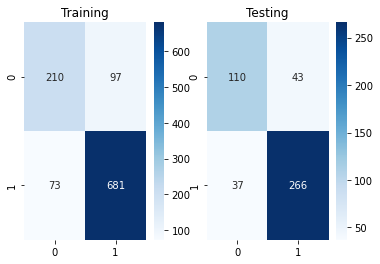

In [380]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_NBgs),annot=True,fmt='.5g',cmap='Blues')
plt.title('Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_NBgs),annot=True,fmt='.5g',cmap='Blues')
plt.title('Testing')

plt.show()

In [381]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_NBgs),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_NBgs),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.74      0.68      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



AUC score for Training data: 0.887
AUC score for Testing data: 0.879


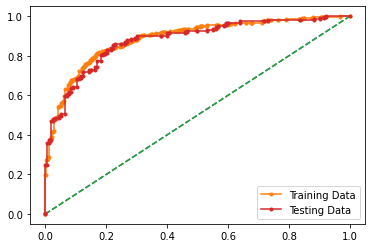

In [382]:
# calculate AUC
nbgs_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_nbgs[:,1])
print('AUC score for Training data: %.3f' % nbgs_train_auc)
# calculate roc curve
nbgs_train_fpr, nbgs_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_nbgs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nbgs_train_fpr, nbgs_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
nbgs_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_nbgs[:,1])
print('AUC score for Testing data: %.3f' % nbgs_test_auc)
# calculate roc curve
nbgs_test_fpr, nbgs_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_nbgs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nbgs_test_fpr, nbgs_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [383]:
print('AUC score for Training data:',nbgs_train_auc)
cmetrics=classification_report(y_train,y_train_predict_NBgs,output_dict=True)
df_NBgstrain=pd.DataFrame(cmetrics).transpose()
NBgs_train_f1=round(df_NBgstrain.loc["1"][2],2)
NBgs_train_recall=round(df_NBgstrain.loc["1"][1],2)
NBgs_train_precision=round(df_NBgstrain.loc["1"][0],2)
NBgs_train_accuracy=round(df_NBgstrain.loc["accuracy"][0],2)
df_NBgstrain

AUC score for Training data: 0.887302465029074


,precision,recall,f1-score,support
0,0.742049,0.684039,0.711864,307.000000
1,0.875321,0.903183,0.889034,754.000000
accuracy,0.839774,0.839774,0.839774,0.839774
macro avg,0.808685,0.793611,0.800449,1061.000000
weighted avg,0.836759,0.839774,0.837770,1061.000000


In [384]:
print('AUC score for Testing data:',nbgs_test_auc)
cmetrics=classification_report(y_test,y_test_predict_NBgs,output_dict=True)
df_NBgstest=pd.DataFrame(cmetrics).transpose()
NBgs_test_f1=round(df_NBgstest.loc["1"][2],2)
NBgs_test_recall=round(df_NBgstest.loc["1"][1],2)
NBgs_test_precision=round(df_NBgstest.loc["1"][0],2)
NBgs_test_accuracy=round(df_NBgstest.loc["accuracy"][0],2)
df_NBgstest


AUC score for Testing data: 0.8786859078064668


,precision,recall,f1-score,support
0,0.748299,0.718954,0.733333,153.000000
1,0.860841,0.877888,0.869281,303.000000
accuracy,0.824561,0.824561,0.824561,0.824561
macro avg,0.804570,0.798421,0.801307,456.000000
weighted avg,0.823081,0.824561,0.823667,456.000000


### KNN with GridSearch

In [561]:
knn = KNeighborsClassifier()
k_range    = range(1,20)
weights    = ['uniform' , 'distance']   
metrics = ['minkowski','euclidean','manhattan']

In [562]:
param_grid = dict(n_neighbors = list(k_range), weights = weights, metric=metrics)

In [563]:
grid_knn = GridSearchCV(knn, param_grid, cv=3,verbose = 1, n_jobs = -1)

In [564]:
grid_knn_model=grid_knn.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 114 candidates, totalling 342 fits


In [565]:
print(grid_knn_model.best_params_)

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


In [566]:
knn_best_train=grid_knn_model.score(X_train_scaled,y_train)
knn_best_test=grid_knn_model.score(X_test_scaled,y_test)
print("KNN GridSreach Model Score for Train Data is ",knn_best_train )
print("KNN  Model Score for Test Data is", knn_best_test)

KNN GridSreach Model Score for Train Data is  1.0
KNN  Model Score for Test Data is 0.831140350877193


In [567]:
y_train_predict_knngs=grid_knn_model.predict(X_train_scaled)
y_test_predict_knngs=grid_knn_model.predict(X_test_scaled)

In [568]:
y_train_predict_prob_knngs=grid_knn_model.predict_proba(X_train_scaled)
y_test_predict_prob_knngs=grid_knn_model.predict_proba(X_test_scaled)

In [428]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

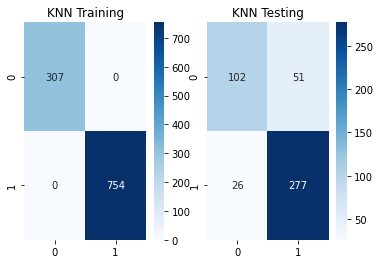

In [571]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_knngs),annot=True,fmt='.5g',cmap='Blues')
plt.title('KNN Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_knngs),annot=True,fmt='.5g',cmap='Blues')
plt.title('KNN Testing')

plt.show()

In [572]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_knngs),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_knngs),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.80      0.67      0.73       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 



AUC score for Training data: 1.000
AUC score for Testing data: 0.889


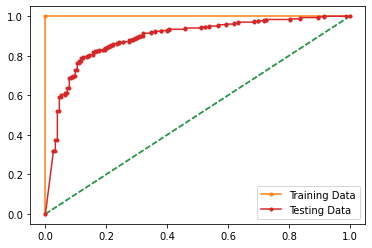

In [573]:
# calculate AUC
knngs_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_knngs[:,1])
print('AUC score for Training data: %.3f' % knngs_train_auc)
# calculate roc curve
knngs_train_fpr, knngs_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_knngs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knngs_train_fpr, knngs_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
knngs_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_knngs[:,1])
print('AUC score for Testing data: %.3f' % knngs_test_auc)
# calculate roc curve
knngs_test_fpr, knngs_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_knngs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knngs_test_fpr, knngs_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [574]:
print('AUC score for Training data:',knngs_train_auc)
cmetrics=classification_report(y_train,y_train_predict_knngs,output_dict=True)
df_knngstrain=pd.DataFrame(cmetrics).transpose()
knngs_train_f1=round(df_knngstrain.loc["1"][2],2)
knngs_train_recall=round(df_knngstrain.loc["1"][1],2)
knngs_train_precision=round(df_knngstrain.loc["1"][0],2)
knngs_train_accuracy=round(df_knngstrain.loc["accuracy"][0],2)
df_knngstrain

AUC score for Training data: 1.0


,precision,recall,f1-score,support
0,1.0,1.0,1.0,307.0
1,1.0,1.0,1.0,754.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1061.0
weighted avg,1.0,1.0,1.0,1061.0


In [575]:
print('AUC score for Testing data:',knngs_test_auc)
cmetrics=classification_report(y_test,y_test_predict_knngs,output_dict=True)
df_knngstest=pd.DataFrame(cmetrics).transpose()
knngs_test_f1=round(df_knngstest.loc["1"][2],2)
knngs_test_recall=round(df_knngstest.loc["1"][1],2)
knngs_test_precision=round(df_knngstest.loc["1"][0],2)
knngs_test_accuracy=round(df_knngstest.loc["accuracy"][0],2)
df_knngstest

AUC score for Testing data: 0.8885006147673591


,precision,recall,f1-score,support
0,0.796875,0.666667,0.725979,153.00000
1,0.844512,0.914191,0.877971,303.00000
accuracy,0.831140,0.831140,0.831140,0.83114
macro avg,0.820694,0.790429,0.801975,456.00000
weighted avg,0.828529,0.831140,0.826974,456.00000


### Random Forest

In [476]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RF_model=RandomForestClassifier(n_estimators=100)

#Train the model using the training set
RF_model.fit(X_train,y_train)

RandomForestClassifier()

In [478]:
rf_train=RF_model.score(X_train,y_train)
rf_test=RF_model.score(X_test,y_test)
print("RF Model Score for Train Data is ",rf_train )
print("RF Model Score for Test Data is", rf_test)

RF Model Score for Train Data is  1.0
RF Model Score for Test Data is 0.831140350877193


In [479]:
y_train_predict_rf=RF_model.predict(X_train)
y_test_predict_rf=RF_model.predict(X_test)
y_train_predict_prob_rf=RF_model.predict_proba(X_train)
y_test_predict_prob_rf=RF_model.predict_proba(X_test)

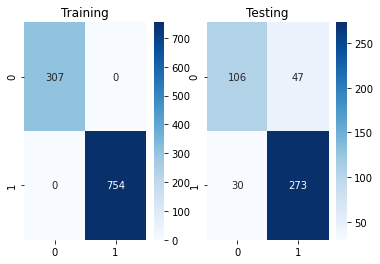

In [480]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_rf),annot=True,fmt='.5g',cmap='Blues')
plt.title('Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_rf),annot=True,fmt='.5g',cmap='Blues')
plt.title('Testing')

plt.show()

In [481]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_rf),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_rf),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



AUC score for Training data: 1.000
AUC score for Testing data: 0.891


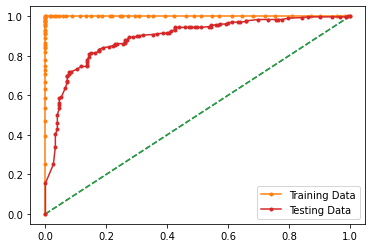

In [482]:
# calculate AUC
rf_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_rf[:,1])
print('AUC score for Training data: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_rf[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
rf_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_rf[:,1])
print('AUC score for Testing data: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_rf[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [483]:
print('AUC score for Training data:',rf_train_auc)
cmetrics=classification_report(y_train,y_train_predict_rf,output_dict=True)
df_rftrain=pd.DataFrame(cmetrics).transpose()
rf_train_f1=round(df_rftrain.loc["1"][2],2)
rf_train_recall=round(df_rftrain.loc["1"][1],2)
rf_train_precision=round(df_rftrain.loc["1"][0],2)
rf_train_accuracy=round(df_rftrain.loc["accuracy"][0],2)
df_rftrain

AUC score for Training data: 1.0


,precision,recall,f1-score,support
0,1.0,1.0,1.0,307.0
1,1.0,1.0,1.0,754.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1061.0
weighted avg,1.0,1.0,1.0,1061.0


In [484]:
print('AUC score for Testing data:',rf_test_auc)
cmetrics=classification_report(y_test,y_test_predict_rf,output_dict=True)
df_rftest=pd.DataFrame(cmetrics).transpose()
rf_test_f1=round(df_rftest.loc["1"][2],2)
rf_test_recall=round(df_rftest.loc["1"][1],2)
rf_test_precision=round(df_rftest.loc["1"][0],2)
rf_test_accuracy=round(df_rftest.loc["accuracy"][0],2)
df_rftest

AUC score for Testing data: 0.890668478612567


,precision,recall,f1-score,support
0,0.779412,0.69281,0.733564,153.00000
1,0.853125,0.90099,0.876404,303.00000
accuracy,0.831140,0.83114,0.831140,0.83114
macro avg,0.816268,0.79690,0.804984,456.00000
weighted avg,0.828392,0.83114,0.828478,456.00000


### Random forest with GridSerachCV

In [620]:
param_grid = {
    'max_depth': [4,5,6],
    'max_features': [4,5,6],
    'min_samples_leaf': [8,10,15],
    'min_samples_split': [40,50,60],
    'n_estimators': [300,]#100,300 
}

rfcl_model = RandomForestClassifier(random_state=1)

rf_grid_best_model = GridSearchCV(estimator = rfcl_model, param_grid = param_grid, cv = 3) 

In [621]:
rf_grid_best_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [8, 10, 15],
                         'min_samples_split': [40, 50, 60],
                         'n_estimators': [300]})

In [691]:
rf_grid_best_model.best_params_

{'max_depth': 4,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 40,
 'n_estimators': 300}

In [622]:
rfgs_train=rf_grid_best_model.score(X_train,y_train)
rfgs_test=rf_grid_best_model.score(X_test,y_test)
print("RF Model Score for Train Data is ",rfgs_train )
print("RF Model Score for Test Data is", rfgs_test)

RF Model Score for Train Data is  0.8529688972667295
RF Model Score for Test Data is 0.8289473684210527


In [623]:
y_train_predict_rfgs=rf_grid_best_model.predict(X_train)
y_test_predict_rfgs=rf_grid_best_model.predict(X_test)
y_train_predict_prob_rfgs=rf_grid_best_model.predict_proba(X_train)
y_test_predict_prob_rfgs=rf_grid_best_model.predict_proba(X_test)

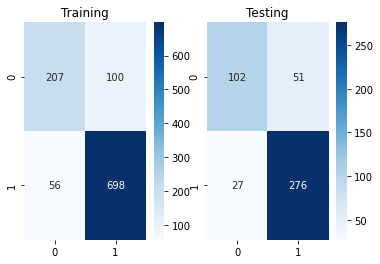

In [624]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_rfgs),annot=True,fmt='.5g',cmap='Blues')
plt.title('Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_rfgs),annot=True,fmt='.5g',cmap='Blues')
plt.title('Testing')

plt.show()

In [625]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_rfgs),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_rfgs),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.79      0.67      0.73       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.79      0.67      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456
 



AUC score for Training data: 0.909
AUC score for Testing data: 0.890


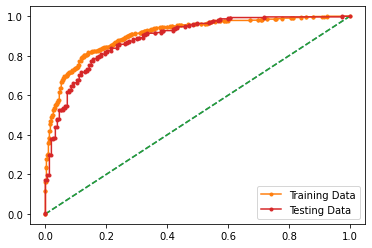

In [626]:
# calculate AUC
rfgs_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_rfgs[:,1])
print('AUC score for Training data: %.3f' % rfgs_train_auc)
# calculate roc curve
rfgs_train_fpr, rfgs_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_rfgs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfgs_train_fpr, rfgs_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
rfgs_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_rfgs[:,1])
print('AUC score for Testing data: %.3f' % rfgs_test_auc)
# calculate roc curve
rfgs_test_fpr, rfgs_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_rfgs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfgs_test_fpr, rfgs_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [627]:
print('AUC score for Training data:',rfgs_train_auc)
cmetrics=classification_report(y_train,y_train_predict_rfgs,output_dict=True)
df_rfgstrain=pd.DataFrame(cmetrics).transpose()
rfgs_train_f1=round(df_rfgstrain.loc["1"][2],2)
rfgs_train_recall=round(df_rfgstrain.loc["1"][1],2)
rfgs_train_precision=round(df_rfgstrain.loc["1"][0],2)
rfgs_train_accuracy=round(df_rfgstrain.loc["accuracy"][0],2)
df_rfgstrain

AUC score for Training data: 0.9093218362004165


,precision,recall,f1-score,support
0,0.787072,0.674267,0.726316,307.000000
1,0.874687,0.925729,0.899485,754.000000
accuracy,0.852969,0.852969,0.852969,0.852969
macro avg,0.830879,0.799998,0.812900,1061.000000
weighted avg,0.849335,0.852969,0.849378,1061.000000


In [628]:
print('AUC score for Testing data:',rfgs_test_auc)
cmetrics=classification_report(y_test,y_test_predict_rfgs,output_dict=True)
df_rfgstest=pd.DataFrame(cmetrics).transpose()
rfgs_test_f1=round(df_rfgstest.loc["1"][2],2)
rfgs_test_recall=round(df_rfgstest.loc["1"][1],2)
rfgs_test_precision=round(df_rfgstest.loc["1"][0],2)
rfgs_test_accuracy=round(df_rfgstest.loc["accuracy"][0],2)
df_rfgstest

AUC score for Testing data: 0.8898487888004486


,precision,recall,f1-score,support
0,0.790698,0.666667,0.723404,153.000000
1,0.844037,0.910891,0.876190,303.000000
accuracy,0.828947,0.828947,0.828947,0.828947
macro avg,0.817367,0.788779,0.799797,456.000000
weighted avg,0.826140,0.828947,0.824927,456.000000


### Bagging

In [669]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [670]:
bgcl_train=bgcl.score(X_train,y_train)
bgcl_test=bgcl.score(X_test,y_test)
print("Bagging Model Score for Train Data is ",bgcl_train )
print("Bagging Model Score for Test Data is", bgcl_test)

Bagging Model Score for Train Data is  0.9641847313854854
Bagging Model Score for Test Data is 0.831140350877193


In [671]:
y_train_predict_bgcl=bgcl.predict(X_train)
y_test_predict_bgcl=bgcl.predict(X_test)
y_train_predict_prob_bgcl=bgcl.predict_proba(X_train)
y_test_predict_prob_bgcl=bgcl.predict_proba(X_test)

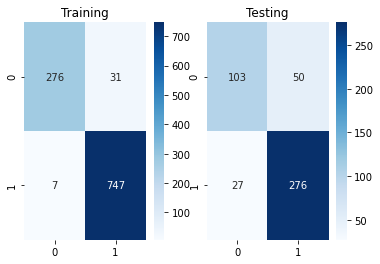

In [672]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_bgcl),annot=True,fmt='.5g',cmap='Blues')
plt.title('Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_bgcl),annot=True,fmt='.5g',cmap='Blues')
plt.title('Testing')

plt.show()

In [673]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_bgcl),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_bgcl),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.98      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.96      1061
   macro avg       0.97      0.94      0.96      1061
weighted avg       0.96      0.96      0.96      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.79      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 



AUC score for Training data: 0.997
AUC score for Testing data: 0.895


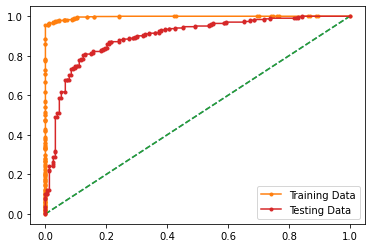

In [674]:
# calculate AUC
bag_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_bgcl[:,1])
print('AUC score for Training data: %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_bgcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
bag_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_bgcl[:,1])
print('AUC score for Testing data: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_bgcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [675]:
print('AUC score for Training data:',bag_train_auc)
cmetrics=classification_report(y_train,y_train_predict_bgcl,output_dict=True)
df_bagtrain=pd.DataFrame(cmetrics).transpose()
bag_train_f1=round(df_bagtrain.loc["1"][2],2)
bag_train_recall=round(df_bagtrain.loc["1"][1],2)
bag_train_precision=round(df_bagtrain.loc["1"][0],2)
bag_train_accuracy=round(df_bagtrain.loc["accuracy"][0],2)
df_bagtrain

AUC score for Training data: 0.9971660373772022


,precision,recall,f1-score,support
0,0.975265,0.899023,0.935593,307.000000
1,0.960154,0.990716,0.975196,754.000000
accuracy,0.964185,0.964185,0.964185,0.964185
macro avg,0.967710,0.944869,0.955395,1061.000000
weighted avg,0.964527,0.964185,0.963737,1061.000000


In [676]:
print('AUC score for Testing data:',bag_test_auc)
cmetrics=classification_report(y_test,y_test_predict_bgcl,output_dict=True)
df_bagtest=pd.DataFrame(cmetrics).transpose()
bag_test_f1=round(df_bagtest.loc["1"][2],2)
bag_test_recall=round(df_bagtest.loc["1"][1],2)
bag_test_precision=round(df_bagtest.loc["1"][0],2)
bag_test_accuracy=round(df_bagtest.loc["accuracy"][0],2)
df_bagtest

AUC score for Testing data: 0.8954787635626309


,precision,recall,f1-score,support
0,0.792308,0.673203,0.727915,153.00000
1,0.846626,0.910891,0.877583,303.00000
accuracy,0.831140,0.831140,0.831140,0.83114
macro avg,0.819467,0.792047,0.802749,456.00000
weighted avg,0.828401,0.831140,0.827366,456.00000


### Bagging with GridSearch

In [608]:
bg_param_grid = {
 'base_estimator': [RandomForestClassifier()],
 'bootstrap': [True, False], 
 'bootstrap_features': [True, False],
 'n_estimators': [50, 80, 100],#100
 'max_samples' : [0.5, 1.0]
}

In [609]:
gb_grid_search=GridSearchCV(BaggingClassifier(random_state=1), param_grid =bg_param_grid, cv=3)# n_jobs=-1, verbose=1)

In [610]:
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [RandomForestClassifier()],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_samples': [0.5, 1.0],
                         'n_estimators': [50, 80, 100]})

In [611]:
bg_best=gb_grid_search.best_estimator_
bg_best

BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.5,
                  n_estimators=80, random_state=1)

In [612]:
baggs_train=bg_best.score(X_train,y_train)
baggs_test=bg_best.score(X_test,y_test)
print("Bagging Grid Model Score for Train Data is ",baggs_train )
print("Bagging Grid Model Score for Test Data is", baggs_test)

Bagging Grid Model Score for Train Data is  0.9132893496701225
Bagging Grid Model Score for Test Data is 0.8333333333333334


In [613]:
y_train_predict_baggs=bg_best.predict(X_train)
y_test_predict_baggs=bg_best.predict(X_test)
y_train_predict_prob_baggs=bg_best.predict_proba(X_train)
y_test_predict_prob_baggs=bg_best.predict_proba(X_test)

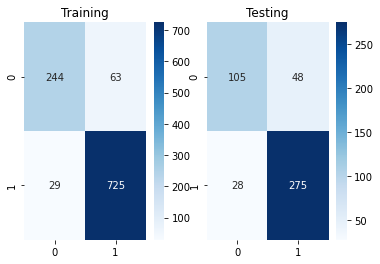

In [614]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_baggs),annot=True,fmt='.5g',cmap='Blues')
plt.title('Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_baggs),annot=True,fmt='.5g',cmap='Blues')
plt.title('Testing')

plt.show()

In [615]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_baggs),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_baggs),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.89      0.79      0.84       307
           1       0.92      0.96      0.94       754

    accuracy                           0.91      1061
   macro avg       0.91      0.88      0.89      1061
weighted avg       0.91      0.91      0.91      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.79      0.69      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC score for Training data: 0.980
AUC score for Testing data: 0.898


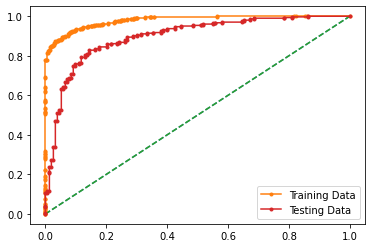

In [616]:
# calculate AUC
baggs_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_baggs[:,1])
print('AUC score for Training data: %.3f' % baggs_train_auc)
# calculate roc curve
baggs_train_fpr, baggs_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_baggs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(baggs_train_fpr, baggs_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
baggs_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_baggs[:,1])
print('AUC score for Testing data: %.3f' % baggs_test_auc)
# calculate roc curve
baggs_test_fpr, baggs_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_baggs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(baggs_test_fpr, baggs_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [617]:
print('AUC score for Training data:',baggs_train_auc)
cmetrics=classification_report(y_train,y_train_predict_baggs,output_dict=True)
df_baggstrain=pd.DataFrame(cmetrics).transpose()
baggs_train_f1=round(df_baggstrain.loc["1"][2],2)
baggs_train_recall=round(df_baggstrain.loc["1"][1],2)
baggs_train_precision=round(df_baggstrain.loc["1"][0],2)
baggs_train_accuracy=round(df_baggstrain.loc["accuracy"][0],2)
df_baggstrain

AUC score for Training data: 0.9798166564425128


,precision,recall,f1-score,support
0,0.893773,0.794788,0.841379,307.000000
1,0.920051,0.961538,0.940337,754.000000
accuracy,0.913289,0.913289,0.913289,0.913289
macro avg,0.906912,0.878163,0.890858,1061.000000
weighted avg,0.912447,0.913289,0.911704,1061.000000


In [618]:
print('AUC score for Testing data:',baggs_test_auc)
cmetrics=classification_report(y_test,y_test_predict_baggs,output_dict=True)
df_baggstest=pd.DataFrame(cmetrics).transpose()
baggs_test_f1=round(df_baggstest.loc["1"][2],2)
baggs_test_recall=round(df_baggstest.loc["1"][1],2)
baggs_test_precision=round(df_baggstest.loc["1"][0],2)
baggs_test_accuracy=round(df_baggstest.loc["accuracy"][0],2)
df_baggstest

AUC score for Testing data: 0.8975711296619858


,precision,recall,f1-score,support
0,0.789474,0.686275,0.734266,153.000000
1,0.851393,0.907591,0.878594,303.000000
accuracy,0.833333,0.833333,0.833333,0.833333
macro avg,0.820433,0.796933,0.806430,456.000000
weighted avg,0.830618,0.833333,0.830168,456.000000


### Ada Boost

In [485]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [486]:
ADB_train=ADB_model.score(X_train,y_train)
ADB_test=ADB_model.score(X_test,y_test)
print("Ada Boost Model Score for Train Data is ",ADB_train )
print("Ada Boost Model Score for Test Data is", ADB_test)

Ada Boost Model Score for Train Data is  0.8463713477851084
Ada Boost Model Score for Test Data is 0.8135964912280702


In [487]:
y_train_predict_ADB=ADB_model.predict(X_train)
y_test_predict_ADB=ADB_model.predict(X_test)
y_train_predict_prob_ADB=ADB_model.predict_proba(X_train)
y_test_predict_prob_ADB=ADB_model.predict_proba(X_test)

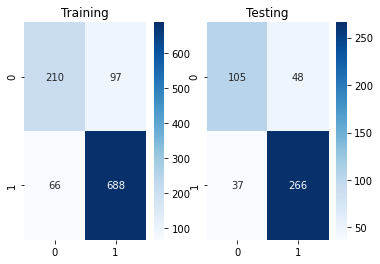

In [488]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_ADB),annot=True,fmt='.5g',cmap='Blues')
plt.title('Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_ADB),annot=True,fmt='.5g',cmap='Blues')
plt.title('Testing')

plt.show()

In [489]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_ADB),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_ADB),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.74      0.69      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456
 



AUC score for Training data: 0.912
AUC score for Testing data: 0.881


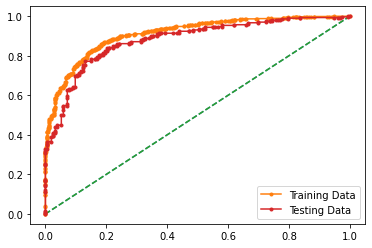

In [490]:
# calculate AUC
ADB_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_ADB[:,1])
print('AUC score for Training data: %.3f' % ADB_train_auc)
# calculate roc curve
ADB_train_fpr, ADB_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_train_fpr, ADB_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
ADB_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_ADB[:,1])
print('AUC score for Testing data: %.3f' % ADB_test_auc)
# calculate roc curve
ADB_test_fpr, ADB_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_test_fpr, ADB_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [491]:
print('AUC score for Training data:',ADB_train_auc)
cmetrics=classification_report(y_train,y_train_predict_ADB,output_dict=True)
df_ADBtrain=pd.DataFrame(cmetrics).transpose()
ADB_train_f1=round(df_ADBtrain.loc["1"][2],2)
ADB_train_recall=round(df_ADBtrain.loc["1"][1],2)
ADB_train_precision=round(df_ADBtrain.loc["1"][0],2)
ADB_train_accuracy=round(df_ADBtrain.loc["accuracy"][0],2)
df_ADBtrain

AUC score for Training data: 0.9118987549572745


,precision,recall,f1-score,support
0,0.760870,0.684039,0.720412,307.000000
1,0.876433,0.912467,0.894087,754.000000
accuracy,0.846371,0.846371,0.846371,0.846371
macro avg,0.818651,0.798253,0.807249,1061.000000
weighted avg,0.842995,0.846371,0.843834,1061.000000


In [492]:
print('AUC score for Testing data:',ADB_test_auc)
cmetrics=classification_report(y_test,y_test_predict_ADB,output_dict=True)
df_ADBtest=pd.DataFrame(cmetrics).transpose()
ADB_test_f1=round(df_ADBtest.loc["1"][2],2)
ADB_test_recall=round(df_ADBtest.loc["1"][1],2)
ADB_test_precision=round(df_ADBtest.loc["1"][0],2)
ADB_test_accuracy=round(df_ADBtest.loc["accuracy"][0],2)
df_ADBtest

AUC score for Testing data: 0.8805517806682629


,precision,recall,f1-score,support
0,0.739437,0.686275,0.711864,153.000000
1,0.847134,0.877888,0.862237,303.000000
accuracy,0.813596,0.813596,0.813596,0.813596
macro avg,0.793285,0.782081,0.787051,456.000000
weighted avg,0.810999,0.813596,0.811783,456.000000


### Ada Boost with GridSearch

In [507]:
params_ada = {
     'n_estimators': np.arange(10,110,10),
     'learning_rate':np.arange (0.1, 2, 0.1)
 }
acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_cv_ada = GridSearchCV(AdaBoostClassifier(random_state=1), param_grid= params_ada, cv=5, scoring=acc_scorer)
grid_best=grid_cv_ada.fit(X_train,y_train)
grid_best.best_params_

{'learning_rate': 0.1, 'n_estimators': 20}

In [521]:
grid_best=grid_best.best_estimator_

In [523]:
ADBgs_train=grid_best.score(X_train,y_train)
ADBgs_test=grid_best.score(X_test,y_test)
print("Ada Boost GridSearch Model Score for Train Data is ",ADBgs_train )
print("Ada Boost GridSerach Model Score for Test Data is", ADBgs_test)

Ada Boost GridSearch Model Score for Train Data is  0.7945334590009425
Ada Boost GridSerach Model Score for Test Data is 0.7785087719298246


In [524]:
y_train_predict_ADBgs = grid_best.predict(X_train)
y_test_predict_ADBgs = grid_best.predict(X_test)
y_train_predict_prob_ADBgs=grid_best.predict_proba(X_train)
y_test_predict_prob_ADBgs=grid_best.predict_proba(X_test)

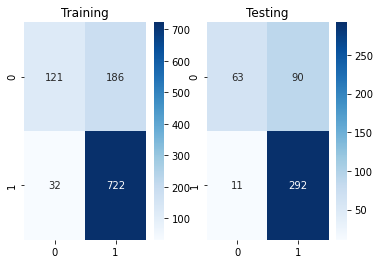

In [525]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_ADBgs),annot=True,fmt='.5g',cmap='Blues')
plt.title('Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_ADBgs),annot=True,fmt='.5g',cmap='Blues')
plt.title('Testing')

plt.show()

In [526]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_ADBgs),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_ADBgs),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.79      0.39      0.53       307
           1       0.80      0.96      0.87       754

    accuracy                           0.79      1061
   macro avg       0.79      0.68      0.70      1061
weighted avg       0.79      0.79      0.77      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.85      0.41      0.56       153
           1       0.76      0.96      0.85       303

    accuracy                           0.78       456
   macro avg       0.81      0.69      0.70       456
weighted avg       0.79      0.78      0.75       456
 



AUC score for Training data: 0.875
AUC score for Testing data: 0.859


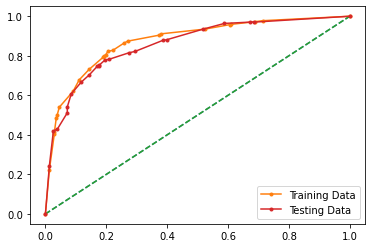

In [499]:
# calculate AUC
ADBgs_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_ADBgs[:,1])
print('AUC score for Training data: %.3f' % ADBgs_train_auc)
# calculate roc curve
ADBgs_train_fpr, ADBgs_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_ADBgs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADBgs_train_fpr, ADBgs_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
ADBgs_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_ADBgs[:,1])
print('AUC score for Testing data: %.3f' % ADBgs_test_auc)
# calculate roc curve
ADBgs_test_fpr, ADBgs_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_ADBgs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADBgs_test_fpr, ADBgs_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [500]:
print('AUC score for Training data:',ADBgs_train_auc)
cmetrics=classification_report(y_train,y_train_predict_ADBgs,output_dict=True)
df_ADBgstrain=pd.DataFrame(cmetrics).transpose()
ADBgs_train_f1=round(df_ADBgstrain.loc["1"][2],2)
ADBgs_train_recall=round(df_ADBgstrain.loc["1"][1],2)
ADBgs_train_precision=round(df_ADBgstrain.loc["1"][0],2)
ADBgs_train_accuracy=round(df_ADBgstrain.loc["accuracy"][0],2)
df_ADBgstrain

AUC score for Training data: 0.8748628379370826


,precision,recall,f1-score,support
0,0.790850,0.394137,0.526087,307.000000
1,0.795154,0.957560,0.868833,754.000000
accuracy,0.794533,0.794533,0.794533,0.794533
macro avg,0.793002,0.675848,0.697460,1061.000000
weighted avg,0.793909,0.794533,0.769659,1061.000000


In [501]:
print('AUC score for Testing data:',ADBgs_test_auc)
cmetrics=classification_report(y_test,y_test_predict_ADBgs,output_dict=True)
df_ADBgstest=pd.DataFrame(cmetrics).transpose()
ADBgs_test_f1=round(df_ADBgstest.loc["1"][2],2)
ADBgs_test_recall=round(df_ADBgstest.loc["1"][1],2)
ADBgs_test_precision=round(df_ADBgstest.loc["1"][0],2)
ADBgs_test_accuracy=round(df_ADBgstest.loc["accuracy"][0],2)
df_ADBgstest

AUC score for Testing data: 0.8585172242714467


,precision,recall,f1-score,support
0,0.851351,0.411765,0.555066,153.000000
1,0.764398,0.963696,0.852555,303.000000
accuracy,0.778509,0.778509,0.778509,0.778509
macro avg,0.807875,0.687731,0.703810,456.000000
weighted avg,0.793573,0.778509,0.752739,456.000000


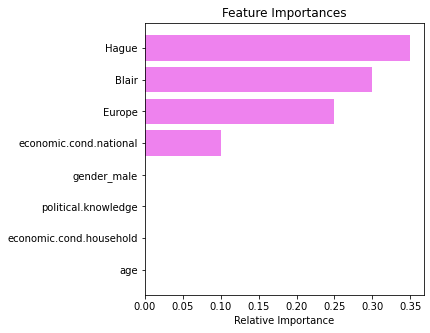

In [665]:
importances = grid_best.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting

In [631]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [632]:
gbcl_train=gbcl.score(X_train,y_train)
gbcl_test=gbcl.score(X_test,y_test)
print("Gradient Boosting Model Score for Train Data is ",gbcl_train )
print("Gradient Boosting Model Score for Test Data is", gbcl_test)

Gradient Boosting Model Score for Train Data is  0.8925541941564562
Gradient Boosting Model Score for Test Data is 0.8355263157894737


In [633]:
y_train_predict_gbcl=gbcl.predict(X_train)
y_test_predict_gbcl=gbcl.predict(X_test)
y_train_predict_prob_gbcl=gbcl.predict_proba(X_train)
y_test_predict_prob_gbcl=gbcl.predict_proba(X_test)

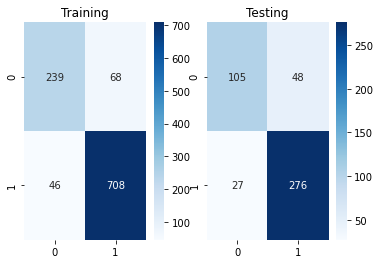

In [634]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_gbcl),annot=True,fmt='.5g',cmap='Blues')
plt.title('Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_gbcl),annot=True,fmt='.5g',cmap='Blues')
plt.title('Testing')

plt.show()

In [635]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_gbcl),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_gbcl),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456
 



AUC score for Training data: 0.951
AUC score for Testing data: 0.899


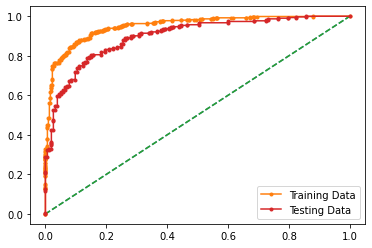

In [636]:
# calculate AUC
gbcl_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_gbcl[:,1])
print('AUC score for Training data: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
gbcl_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_gbcl[:,1])
print('AUC score for Testing data: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [637]:
print('AUC score for Training data:',gbcl_train_auc)
cmetrics=classification_report(y_train,y_train_predict_gbcl,output_dict=True)
df_gbcltrain=pd.DataFrame(cmetrics).transpose()
gbcl_train_f1=round(df_gbcltrain.loc["1"][2],2)
gbcl_train_recall=round(df_gbcltrain.loc["1"][1],2)
gbcl_train_precision=round(df_gbcltrain.loc["1"][0],2)
gbcl_train_accuracy=round(df_gbcltrain.loc["accuracy"][0],2)
df_gbcltrain

AUC score for Training data: 0.951155185373988


,precision,recall,f1-score,support
0,0.838596,0.778502,0.807432,307.000000
1,0.912371,0.938992,0.925490,754.000000
accuracy,0.892554,0.892554,0.892554,0.892554
macro avg,0.875484,0.858747,0.866461,1061.000000
weighted avg,0.891024,0.892554,0.891330,1061.000000


In [638]:
print('AUC score for Testing data:',gbcl_test_auc)
cmetrics=classification_report(y_test,y_test_predict_gbcl,output_dict=True)
df_gbcltest=pd.DataFrame(cmetrics).transpose()
gbcl_test_f1=round(df_gbcltest.loc["1"][2],2)
gbcl_test_recall=round(df_gbcltest.loc["1"][1],2)
gbcl_test_precision=round(df_gbcltest.loc["1"][0],2)
gbcl_test_accuracy=round(df_gbcltest.loc["accuracy"][0],2)
df_gbcltest

AUC score for Testing data: 0.8993615047779289


,precision,recall,f1-score,support
0,0.795455,0.686275,0.736842,153.000000
1,0.851852,0.910891,0.880383,303.000000
accuracy,0.835526,0.835526,0.835526,0.835526
macro avg,0.823653,0.798583,0.808612,456.000000
weighted avg,0.832929,0.835526,0.832221,456.000000


### Gradient Boosting with GridSearch

In [678]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

gbc_tuned = grid_obj.best_estimator_
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=1, random_state=1, subsample=1)

In [679]:
GB_train=gbc_tuned.score(X_train,y_train)
GB_test=gbc_tuned.score(X_test,y_test)
print("Ada Boost Model Score for Train Data is ",GB_train )
print("Ada Boost Model Score for Test Data is", GB_test)

Ada Boost Model Score for Train Data is  0.8765315739868049
Ada Boost Model Score for Test Data is 0.8377192982456141


In [680]:
y_train_predict_gbgs=gbc_tuned.predict(X_train)
y_test_predict_gbgs=gbc_tuned.predict(X_test)
y_train_predict_prob_gbgs=gbc_tuned.predict_proba(X_train)
y_test_predict_prob_gbgs=gbc_tuned.predict_proba(X_test)

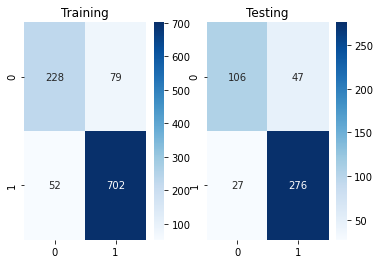

In [681]:
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict_gbgs),annot=True,fmt='.5g',cmap='Blues')
plt.title('Training')


plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict_gbgs),annot=True,fmt='.5g',cmap='Blues')
plt.title('Testing')

plt.show()

In [682]:
print('Classification report of Training Data:\n\n',metrics.classification_report(y_train, y_train_predict_gbgs),'\n')
print('Classification report of Testing Data:\n\n',metrics.classification_report(y_test, y_test_predict_gbgs),'\n')

Classification report of Training Data:

               precision    recall  f1-score   support

           0       0.81      0.74      0.78       307
           1       0.90      0.93      0.91       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.87      0.88      0.87      1061
 

Classification report of Testing Data:

               precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456
 



AUC score for Training data: 0.933
AUC score for Testing data: 0.894


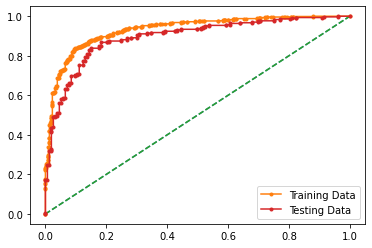

In [683]:
# calculate AUC
gbgs_train_auc=metrics.roc_auc_score(y_train,y_train_predict_prob_gbgs[:,1])
print('AUC score for Training data: %.3f' % gbgs_train_auc)
# calculate roc curve
gbgs_train_fpr, gbgs_train_tpr, thresholds = metrics.roc_curve(y_train, y_train_predict_prob_gbgs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbgs_train_fpr, gbgs_train_tpr, marker='.', label = 'Training Data')

# calculate AUC
gbgs_test_auc=metrics.roc_auc_score(y_test,y_test_predict_prob_gbgs[:,1])
print('AUC score for Testing data: %.3f' % gbgs_test_auc)
# calculate roc curve
gbgs_test_fpr, gbgs_test_tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_prob_gbgs[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbgs_test_fpr, gbgs_test_tpr, marker='.', label = 'Testing Data')

plt.legend(loc='best')
plt.show()

In [684]:
print('AUC score for Training data:',gbgs_train_auc)
cmetrics=classification_report(y_train,y_train_predict_gbgs,output_dict=True)
df_gbgstrain=pd.DataFrame(cmetrics).transpose()
gbgs_train_f1=round(df_gbgstrain.loc["1"][2],2)
gbgs_train_recall=round(df_gbgstrain.loc["1"][1],2)
gbgs_train_precision=round(df_gbgstrain.loc["1"][0],2)
gbgs_train_accuracy=round(df_gbgstrain.loc["accuracy"][0],2)
df_gbgstrain

AUC score for Training data: 0.9325594656943641


,precision,recall,f1-score,support
0,0.814286,0.742671,0.776831,307.000000
1,0.898848,0.931034,0.914658,754.000000
accuracy,0.876532,0.876532,0.876532,0.876532
macro avg,0.856567,0.836853,0.845745,1061.000000
weighted avg,0.874380,0.876532,0.874778,1061.000000


In [685]:
print('AUC score for Testing data:',gbgs_test_auc)
cmetrics=classification_report(y_test,y_test_predict_gbgs,output_dict=True)
df_gbgstest=pd.DataFrame(cmetrics).transpose()
gbgs_test_f1=round(df_gbgstest.loc["1"][2],2)
gbgs_test_recall=round(df_gbgstest.loc["1"][1],2)
gbgs_test_precision=round(df_gbgstest.loc["1"][0],2)
gbgs_test_accuracy=round(df_gbgstest.loc["accuracy"][0],2)
df_gbgstest

AUC score for Testing data: 0.8942060872753943


,precision,recall,f1-score,support
0,0.796992,0.692810,0.741259,153.000000
1,0.854489,0.910891,0.881789,303.000000
accuracy,0.837719,0.837719,0.837719,0.837719
macro avg,0.825741,0.801851,0.811524,456.000000
weighted avg,0.835198,0.837719,0.834637,456.000000


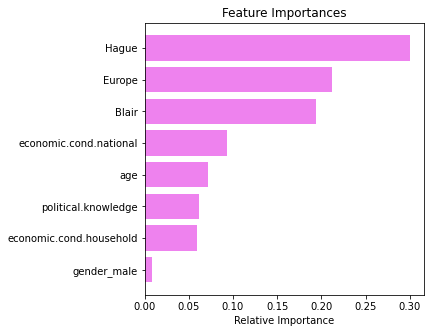

In [686]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

In [687]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame(
    {'LR Train'     : [lgr_train_accuracy,lgr_train_auc,lgr_train_recall,lgr_train_precision,lgr_train_f1],
     'LR Test'      : [lgr_test_accuracy,lgr_test_auc,lgr_test_recall,lgr_test_precision,lgr_test_f1],
     'LR Grid Train': [lgrgs_train_accuracy,lgrgs_train_auc,lgrgs_train_recall,lgrgs_train_precision,lgrgs_train_f1],
     'LR Grid Test' : [lgrgs_test_accuracy,lgrgs_test_auc,lgrgs_test_recall,lgrgs_test_precision,lgrgs_test_f1],
     'LDA Train':[lda_train_accuracy,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
     'LDA Test': [lda_test_accuracy,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
     'LDA Grid Train': [ldags_train_accuracy,ldags_train_auc,ldags_train_recall,ldags_train_precision,ldags_train_f1],
     'LDA Grid Test' : [ldags_test_accuracy,ldags_test_auc,ldags_test_recall,ldags_test_precision,ldags_test_f1],
     'NB Train'     : [nb_train_accuracy,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],     
     'NB Test'      : [nb_test_accuracy,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
     'NB Grid Train': [NBgs_train_accuracy,nbgs_train_auc,NBgs_train_recall,NBgs_train_precision,NBgs_train_f1], 
     'NB Grid Test' : [NBgs_test_accuracy,nbgs_test_auc,NBgs_test_recall,NBgs_test_precision,NBgs_test_f1],  
     'KNN Train'    : [knn_train_accuracy,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],     
     'KNN Test'     : [knn_test_accuracy,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],     
     'KNN Grid Train':[knngs_train_accuracy,knngs_train_auc,knngs_train_recall,knngs_train_precision,knngs_train_f1],   
     'KNN Grid Test': [knngs_test_accuracy,knngs_test_auc,knngs_test_recall,knngs_test_precision,knngs_test_f1],
     'KNN K=17 Train': [knnnw_train_accuracy,knnnw_train_auc,knnnw_train_recall,knnnw_train_precision,knnnw_train_f1],
    'KNN K=17 Test': [knnnw_test_accuracy,knnnw_test_auc,knnnw_test_recall,knnnw_test_precision,knnnw_test_f1] ,  
    'RainForest Train':[rf_train_accuracy,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
    'RainForest Test':[rf_test_accuracy,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1], 
    'RainForest Grid Train':[rfgs_train_accuracy,rfgs_train_auc,rfgs_train_recall,rfgs_train_precision,rfgs_train_f1],
    'RainForest Grid Test':[rfgs_test_accuracy,rfgs_test_auc,rfgs_test_recall,rfgs_test_precision,rfgs_test_f1], 
     'Bagging Train': [bag_train_accuracy,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],     
     'Bagging Test' : [bag_test_accuracy,bag1_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
     'Bagging Grid Train':[baggs_train_accuracy, baggs_train_auc,baggs_train_recall,baggs_train_precision,baggs_train_f1],
     'Bagging Grid Test':[baggs_test_accuracy,baggs_test_auc,baggs_test_recall,baggs_test_precision,baggs_test_f1],
    'AdaBoost Train': [ADB_train_accuracy,ADB_train_auc,ADB_train_recall,ADB_train_precision,ADB_train_f1], 
     'AdaBoost Test': [ADB_test_accuracy,ADB_test_auc,ADB_test_recall,ADB_test_precision,ADB_test_f1],
    'AdaBoost Grid Train': [ADBgs_train_accuracy,ADBgs_train_auc,ADBgs_train_recall,ADBgs_train_precision,ADBgs_train_f1],
    'AdaBoost Grid Test':[ADBgs_test_accuracy,ADBgs_test_auc,ADBgs_test_recall,ADBgs_test_precision,ADBgs_test_f1],
     'Gradient-Boost Train': [gbcl_train_accuracy,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],    
     'Gradient-Boost Test': [gbcl_test_accuracy,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],   
    'Gradient-Boost Grid Train': [gbgs_train_accuracy,gbgs_train_auc,gbgs_train_recall,gbgs_train_precision,gbgs_train_f1],
     'Gradient-Boost Grid Test': [gbgs_test_accuracy,gbgs_test_auc,gbgs_test_recall,gbgs_test_precision,gbgs_test_f1],
    },index=index).T
round(data,3)

,Accuracy,AUC,Recall,Precision,F1 Score
LR Train,0.84,0.890,0.91,0.86,0.89
LR Test,0.83,0.879,0.88,0.86,0.87
LR Grid Train,0.83,0.890,0.91,0.86,0.88
LR Grid Test,0.83,0.883,0.88,0.86,0.87
LDA Train,0.83,0.889,0.91,0.86,0.89
LDA Test,0.83,0.888,0.89,0.86,0.88
LDA Grid Train,0.83,0.889,0.91,0.86,0.89
LDA Grid Test,0.83,0.888,0.89,0.86,0.88
NB Train,0.84,0.888,0.90,0.88,0.89
NB Test,0.82,0.876,0.87,0.87,0.87


### Problem 2

In [2]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [3]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.20.1
Pandas version: 1.2.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.6.1
Matplotlib version: 3.3.4


In [4]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [5]:
df_Roosevelt=inaugural.raw('1941-Roosevelt.txt')
df_Kennedy=inaugural.raw('1961-Kennedy.txt')
df_Nixon=inaugural.raw('1973-Nixon.txt')

### 2.1 Find the number of characters, words, and sentences for the mentioned documents.

### Number of Characters, Words and Sentences for document President Franklin D.Roosevelt in 1941:

In [7]:
df_Roosevelt=inaugural.raw('1941-Roosevelt.txt')

In [623]:
type(df_Roosevelt)

str

In [8]:
df_Roosevelt

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [6]:
# Splitting the text data at '\n' and creating a corpus of documents
df_Roosevelt_split = df_Roosevelt.split('\n\n')

In [625]:
# Checking Type:
type(df_Roosevelt_split)

list

In [748]:
print('No of characters in document President 1941-Franklin D. Roosevelt(with space)', len(df_Roosevelt))

No of characters in document President 1941-Franklin D. Roosevelt(with space) 7571


In [744]:
df_Roosevelt_char=df_Roosevelt.replace(" ","")

In [749]:
print('No of characters in document President 1941-Franklin D. Roosevelt(without space)', len(df_Roosevelt_char))

No of characters in document President 1941-Franklin D. Roosevelt(without space) 6249


In [7]:
# Creating Dataframe
df_Roosevelt_text= pd.DataFrame(df_Roosevelt_split)

In [8]:
# Renaming the feature column
df_Roosevelt_text.columns=['speech']

In [679]:
df_Roosevelt_text.head(10)

,speech
0,On each national day of inauguration since 178...
1,In Washington's day the task of the people was...
2,In Lincoln's day the task of the people was to...
3,In this day the task of the people is to save ...
4,"To us there has come a time, in the midst of s..."
5,Lives of nations are determined not by the cou...
6,There are men who doubt this. There are men wh...
7,But we Americans know that this is not true.
8,"Eight years ago, when the life of this Republi..."
9,These later years have been living years -- fr...


In [680]:
df_Roosevelt_text.shape
print('The number of rows of the dataframe in 1941-Franklin D. Roosevelt is',df_Roosevelt_text.shape[0])
print('The number of columns of the dataframe in 1941-Franklin D. Roosevelt is',df_Roosevelt_text.shape[1])

The number of rows of the dataframe in 1941-Franklin D. Roosevelt is 38
The number of columns of the dataframe in 1941-Franklin D. Roosevelt is 1


In [746]:
all_words_Roosevelt = inaugural.words('1941-Roosevelt.txt')
length_all_words_Roosevelt=len(all_words_Roosevelt)
print("Number of all words in text 1941-Roosevelt is",length_all_words_Roosevelt)

Number of all words in text 1941-Roosevelt is 1536


In [646]:
#Number of Sentences

inaugural.sents('1941-Roosevelt.txt')

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ...]

In [747]:
all_sents_Roosevelt = inaugural.sents('1941-Roosevelt.txt')
length_all_sents_Roosevelt=len(all_sents_Roosevelt)
print("Number of all sentences in text 1941-Roosevelt is",length_all_sents_Roosevelt)

Number of all sentences in text 1941-Roosevelt is 68


### Number of Characters, Words and Sentences for document President John F.Kennedy in 1961:

In [704]:
df_Kennedy=inaugural.raw('1961-Kennedy.txt')

In [652]:
type(df_Kennedy)

str

In [866]:
df_Kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [9]:
# Splitting the text data at '\n' and creating a corpus of documents
df_Kennedy_split = df_Kennedy.split('\n\n')

In [654]:
type(df_Kennedy_split)

list

In [732]:
print('No of characters in document President 1961-John F. Kennedy(with space)', len(df_Kennedy))

No of characters in document President 1961-John F. Kennedy(with space) 7618


In [741]:
df_Kennedy_char=df_Kennedy.replace(" ","")

In [742]:
print('No of characters in document President 1961-John F. Kennedy(without space)', len(df_Kennedy_char))

No of characters in document President 1961-John F. Kennedy(without space) 6255


In [10]:
# Creating a Dataframe
df_Kennedy_text = pd.DataFrame(df_Kennedy_split)

In [11]:
df_Kennedy_text.columns=['speech']

In [692]:
df_Kennedy_text.head(10)

,speech
0,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1,The world is very different now. For man holds...
2,We dare not forget today that we are the heirs...
3,"Let every nation know, whether it wishes us we..."
4,This much we pledge -- and more.
5,To those old allies whose cultural and spiritu...
6,To those new States whom we welcome to the ran...
7,To those peoples in the huts and villages acro...
8,"To our sister republics south of our border, w..."
9,"To that world assembly of sovereign states, th..."


In [708]:
df_Kennedy_text.shape
print('The number of rows of the dataframe in 1961-John F. Kennedy is',df_Kennedy_text.shape[0])
print('The number of columns of the dataframe in 1961-John F. Kennedy is',df_Kennedy_text.shape[1])

The number of rows of the dataframe in 1961-John F. Kennedy is 27
The number of columns of the dataframe in 1961-John F. Kennedy is 1


In [750]:
#Number of words

all_words_Kennedy = inaugural.words('1961-Kennedy.txt')
length_all_words_Kennedy=len(all_words_Kennedy)
print("Number of all words in text 1961-Kennedy is",length_all_words_Kennedy)

Number of all words in text 1961-Kennedy is 1546


In [663]:
#Number of Sentences

inaugural.sents('1961-Kennedy.txt')

[['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.'], ['For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.'], ...]

In [751]:
all_sents_Kennedy = inaugural.sents('1961-Kennedy.txt')
length_all_sents_Kennedy=len(all_sents_Kennedy)
print("Number of all sentences in text 1961-Kennedy is",length_all_sents_Kennedy)

Number of all sentences in text 1961-Kennedy is 52


### Number of Characters, Words and Sentences for document President Richard Nixon in 1973:


In [668]:
df_Nixon=inaugural.raw('1973-Nixon.txt')

In [669]:
type(df_Nixon)

str

In [867]:
df_Nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [12]:
# Splitting the text data at '\n' and creating a corpus of documents
df_Nixon_split = df_Nixon.split('\n\n')

In [671]:
type(df_Nixon_split)

list

In [730]:
print('No of characters in document President 1973-Richard Nixon(with space):',len(df_Nixon))

No of characters in document President Richard Nixon in 1973(with space): 9991


In [729]:
df_Nixon_char=df_Nixon.replace(" ","")

In [731]:
print('No of characters in document President 1973-Richard Nixon(without space):',len(df_Nixon_char))

No of characters in document President Richard Nixon in 1973(without space): 8223


In [13]:
# Creating Dataframe

df_Nixon_text = pd.DataFrame(df_Nixon_split)

# Renaming the feature column

df_Nixon_text.columns=['speech']
df_Nixon_text.head(10)


,speech
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."
1,"When we met here four years ago, America was b..."
2,"As we meet here today, we stand on the thresho..."
3,The central question before us is: How shall w...
4,Let us resolve that this will be what it can b...
5,This past year saw far-reaching results from o...
6,The peace we seek in the world is not the flim...
7,It is important that we understand both the ne...
8,Unless we in America work to preserve the peac...
9,"Unless we in America work to preserve freedom,..."


In [718]:
df_Nixon_text.shape
print('The number of rows of the dataframe in 1973-Richard Nixon is',df_Nixon_text.shape[0])
print('The number of columns of the dataframe in 1973-Richard Nixon is',df_Nixon_text.shape[1])

The number of rows of the dataframe in 1973-Richard Nixon is 51
The number of columns of the dataframe in 1973-Richard Nixon is 1


In [752]:
#Number of Words

all_words_Nixon= inaugural.words('1973-Nixon.txt')
length_all_words_Nixon=len(all_words_Nixon)
print("Number of all words in text 1973-Nixon is",length_all_words_Nixon)

Number of all words in text 1973-Nixon is 2028


In [721]:
#Number of Sentences

inaugural.sents('1973-Nixon.txt')

[['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':'], ['When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.'], ...]

In [753]:
all_sents_Nixon = inaugural.sents('1973-Nixon.txt')
length_all_sents_Nixon=len(all_sents_Nixon)
print("Number of all sentences in text 1973-Nixon is",length_all_sents_Nixon)

Number of all sentences in text 1973-Nixon is 69


### 2.2 Remove all the stopwords from all three speeches. 

### For President Franklin D. Roosevelt in 1941:

### Lower Case conversion

In [14]:
df_Roosevelt_text['speech'] = df_Roosevelt_text['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_Roosevelt_text['speech'].head()

0    on each national day of inauguration since 178...
1    in washington's day the task of the people was...
2    in lincoln's day the task of the people was to...
3    in this day the task of the people is to save ...
4    to us there has come a time, in the midst of s...
Name: speech, dtype: object

### Removal of Punctuation

In [15]:
df_Roosevelt_text['speech']=df_Roosevelt_text['speech'].str.replace('[^\w\s]','')
df_Roosevelt_text['speech'].head()

0    on each national day of inauguration since 178...
1    in washingtons day the task of the people was ...
2    in lincolns day the task of the people was to ...
3    in this day the task of the people is to save ...
4    to us there has come a time in the midst of sw...
Name: speech, dtype: object

In [16]:
#word_count before stopwords

df_Roosevelt_text['word_count_before'] = df_Roosevelt_text['speech'].apply(lambda x: len(str(x).split(" ")))
df_Roosevelt_text[['speech','word_count_before']].head()

,speech,word_count_before
0,on each national day of inauguration since 178...,20
1,in washingtons day the task of the people was ...,16
2,in lincolns day the task of the people was to ...,17
3,in this day the task of the people is to save ...,20
4,to us there has come a time in the midst of sw...,53


In [257]:
df_Roosevelt_text[['word_count_before']].sum()

word_count_before    1360
dtype: int64

### Removal of StopWords

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_Roosevelt_text['speech'] = df_Roosevelt_text['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_Roosevelt_text['speech'].head()

0    national day inauguration since 1789 people re...
1    washingtons day task people create weld togeth...
2    lincolns day task people preserve nation disru...
3    day task people save nation institutions disru...
4    us come time midst swift happenings pause mome...
Name: speech, dtype: object

In [259]:
#word_count after stopwords

df_Roosevelt_text['word_count_after'] = df_Roosevelt_text['speech'].apply(lambda x: len(str(x).split(" ")))
df_Roosevelt_text[['speech','word_count_before','word_count_after']].head(10)

,speech,word_count_before,word_count_after
0,national day inauguration since 1789 people re...,20,11
1,washingtons day task people create weld togeth...,16,8
2,lincolns day task people preserve nation disru...,17,8
3,day task people save nation institutions disru...,20,8
4,us come time midst swift happenings pause mome...,53,19
5,lives nations determined count years lifetime ...,51,21
6,men doubt men believe democracy form governmen...,59,26
7,americans know true,9,3
8,eight years ago life republic seemed frozen fa...,38,18
9,later years living years fruitful years people...,42,20


In [103]:
df_Roosevelt_text[['word_count_before','word_count_after']].sum()

word_count_before    1360
word_count_after      627
dtype: int64

In [260]:
# Sample sentence

df_Roosevelt_text['speech'][0]

'national day inauguration since 1789 people renewed sense dedication united states'

### For President John F. Kennedy in 1961:

In [18]:
#Lower Case conversion

df_Kennedy_text['speech'] = df_Kennedy_text['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_Kennedy_text['speech'].head()

0    vice president johnson, mr. speaker, mr. chief...
1    the world is very different now. for man holds...
2    we dare not forget today that we are the heirs...
3    let every nation know, whether it wishes us we...
4                     this much we pledge -- and more.
Name: speech, dtype: object

In [19]:
#Removal of Punctuation

df_Kennedy_text['speech']=df_Kennedy_text['speech'].str.replace('[^\w\s]','')
df_Kennedy_text['speech'].head()

0    vice president johnson mr speaker mr chief jus...
1    the world is very different now for man holds ...
2    we dare not forget today that we are the heirs...
3    let every nation know whether it wishes us wel...
4                        this much we pledge  and more
Name: speech, dtype: object

In [263]:
#word_count before stopwords

df_Kennedy_text['word_count_before'] = df_Kennedy_text['speech'].apply(lambda x: len(str(x).split(" ")))
df_Kennedy_text[['speech','word_count_before']].head()

,speech,word_count_before
0,vice president johnson mr speaker mr chief jus...,73
1,the world is very different now for man holds ...,68
2,we dare not forget today that we are the heirs...,96
3,let every nation know whether it wishes us wel...,40
4,this much we pledge and more,7


In [264]:
df_Kennedy_text[['word_count_before']].sum()

word_count_before    1390
dtype: int64

In [20]:
#removal of stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
df_Kennedy_text['speech'] = df_Kennedy_text['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_Kennedy_text['speech'].head()

0    vice president johnson mr speaker mr chief jus...
1    world different man holds mortal hands power a...
2    dare forget today heirs first revolution let w...
3    let every nation know whether wishes us well i...
4                                          much pledge
Name: speech, dtype: object

In [266]:
#word_count after stopwords

df_Kennedy_text['word_count_after'] = df_Kennedy_text['speech'].apply(lambda x: len(str(x).split(" ")))
df_Kennedy_text[['speech','word_count_before','word_count_after']].head(10)

,speech,word_count_before,word_count_after
0,vice president johnson mr speaker mr chief jus...,73,46
1,world different man holds mortal hands power a...,68,31
2,dare forget today heirs first revolution let w...,96,46
3,let every nation know whether wishes us well i...,40,25
4,much pledge,7,2
5,old allies whose cultural spiritual origins sh...,52,26
6,new states welcome ranks free pledge word one ...,85,42
7,peoples huts villages across globe struggling ...,73,32
8,sister republics south border offer special pl...,95,50
9,world assembly sovereign states united nations...,67,33


In [113]:
df_Kennedy_text[['word_count_before','word_count_after']].sum()

word_count_before    1390
word_count_after      693
dtype: int64

In [73]:
# Sample sentence

df_Kennedy_text['speech'][0]

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago'

### For President Richard Nixon in 1973

In [21]:
#Lower Case conversion

df_Nixon_text['speech'] = df_Nixon_text['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_Nixon_text['speech'].head()

0    mr. vice president, mr. speaker, mr. chief jus...
1    when we met here four years ago, america was b...
2    as we meet here today, we stand on the thresho...
3    the central question before us is: how shall w...
4    let us resolve that this will be what it can b...
Name: speech, dtype: object

In [22]:
#Removal of Punctuation

df_Nixon_text['speech']=df_Nixon_text['speech'].str.replace('[^\w\s]','')
df_Nixon_text['speech'].head()

0    mr vice president mr speaker mr chief justice ...
1    when we met here four years ago america was bl...
2    as we meet here today we stand on the threshol...
3    the central question before us is how shall we...
4    let us resolve that this will be what it can b...
Name: speech, dtype: object

In [269]:
#word_count before stopwords

df_Nixon_text['word_count_before'] = df_Nixon_text['speech'].apply(lambda x: len(str(x).split(" ")))
df_Nixon_text[['speech','word_count_before']].head()

,speech,word_count_before
0,mr vice president mr speaker mr chief justice ...,25
1,when we met here four years ago america was bl...,27
2,as we meet here today we stand on the threshol...,19
3,the central question before us is how shall we...,51
4,let us resolve that this will be what it can b...,38


In [118]:
df_Nixon_text[['word_count_before']].sum()

word_count_before    1819
dtype: int64

In [23]:
#removal of stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
df_Nixon_text['speech'] = df_Nixon_text['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_Nixon_text['speech'].head()

0    mr vice president mr speaker mr chief justice ...
1    met four years ago america bleak spirit depres...
2       meet today stand threshold new era peace world
3    central question us shall use peace let us res...
4    let us resolve become time great responsibilit...
Name: speech, dtype: object

In [241]:
#word_count after stopwords

df_Nixon_text['word_count_after'] = df_Nixon_text['speech'].apply(lambda x: len(str(x).split(" ")))
df_Nixon_text[['speech','word_count_before','word_count_after']].head(10)

,speech,word_count_before,word_count_after
0,mr vice president mr speaker mr chief justice ...,25,19
1,met four years ago america bleak spirit depres...,27,16
2,meet today stand threshold new era peace world,19,8
3,central question us shall use peace let us res...,51,24
4,let us resolve become time great responsibilit...,38,17
5,past year saw farreaching results new policies...,81,43
6,peace seek world flimsy peace merely interlude...,29,12
7,important understand necessity limitations ame...,19,8
8,unless america work preserve peace peace,14,6
9,unless america work preserve freedom freedom,13,6


In [121]:
df_Nixon_text[['word_count_before','word_count_after']].sum()

word_count_before    1819
word_count_after      833
dtype: int64

In [242]:
# Sample sentence

df_Nixon_text['speech'][0]

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together'

### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

### For President Franklin D. Roosevelt in 1941

In [688]:
#Most common words:

freq_Roosevelt=pd.Series(' '.join(df_Roosevelt_text['speech']).split()).value_counts()[:4]
freq_Roosevelt

nation       11
know         10
democracy     9
spirit        9
dtype: int64

### For President John F. Kennedy in 1961:

In [24]:
#Common Words Removal:

freq_Kennedy=pd.Series(' '.join(df_Kennedy_text['speech']).split()).value_counts()[:4]
freq_Kennedy

let      16
us       12
world     8
sides     8
dtype: int64

### For President Richard Nixon in 1973:

In [25]:
#Common Words Removal:

freq_Nixon=pd.Series(' '.join(df_Nixon_text['speech']).split()).value_counts()[:4]
freq_Nixon

us       26
let      22
peace    19
world    16
dtype: int64

### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 

### Word Cloud for  President Roosevelt 

In [274]:
corpus1 = ' '.join(df_Roosevelt_text['speech'])

Word Cloud for  President Roosevelt After Stop Word Removal !!


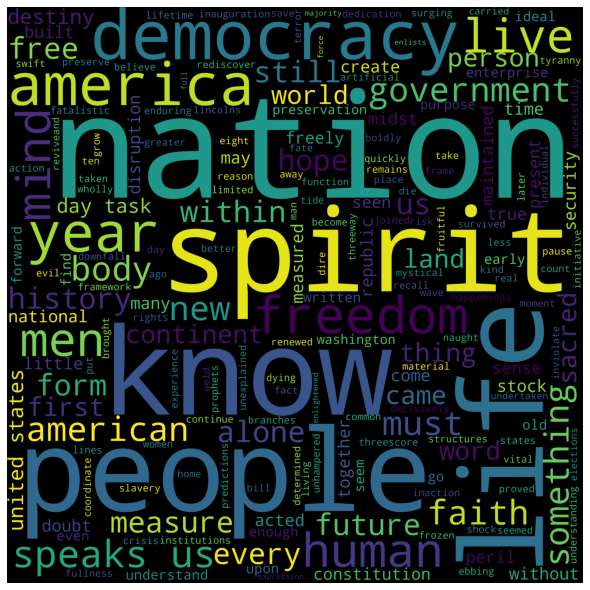

In [275]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(corpus1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for  President Roosevelt After Stop Word Removal !!")
plt.show()


### Word Cloud for President Kennedy

In [276]:
corpus2 = ' '.join(df_Kennedy_text['speech'])

Word Cloud for President Kennedy After Stop Word Removal !!


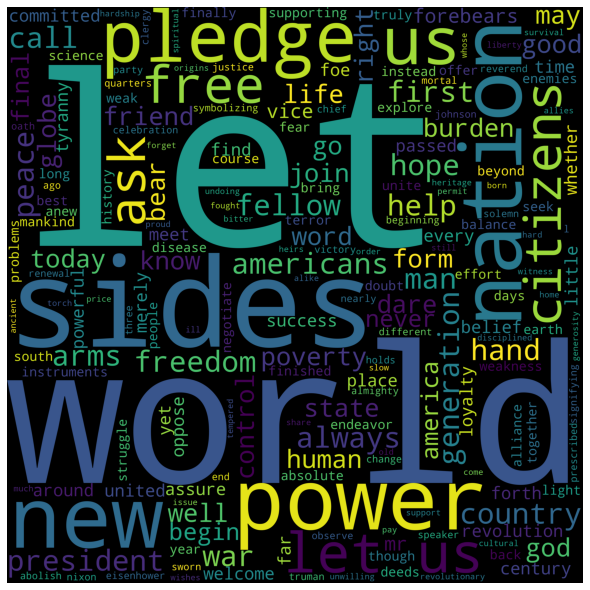

In [277]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(corpus2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Kennedy After Stop Word Removal !!")
plt.show()


### Word Cloud for President Nixon

In [278]:
corpus3 = ' '.join(df_Nixon_text['speech'])

Word Cloud for President Nixon After Stop Word Removal !!


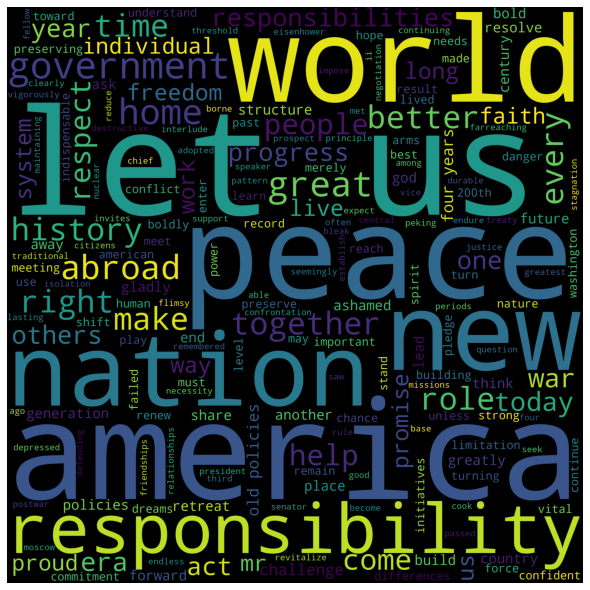

In [279]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(corpus3) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Nixon After Stop Word Removal !!")
plt.show()